# Machine Learning - 2nd Evaluation phase

### 2) Temperature Prediction Project 

-- Project Description

This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.

-- Attribute Information

1. station - used weather station number: 1 to 25

2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')

3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6

4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9

5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5

6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100

7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5

8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6

9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9

10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4

11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97

12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97

13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98

14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97

15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7

16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6

17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8

18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7

19. lat - Latitude (Â°): 37.456 to 37.645

20. lon - Longitude (Â°): 126.826 to 127.135

21. DEM - Elevation (m): 12.4 to 212.3

22. Slope - Slope (Â°): 0.1 to 5.2

23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9

24. Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9

25. Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8T

-- Task

You have to build separate models that can predict the minimum temperature for the next day and the maximum temperature for the next day based on the details provided in the dataset.
(i.e Next_Tmax and Next_Tmin)

In [196]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [199]:
temp = pd.read_csv("C:/Users/user/Downloads/temperature.csv")
pd.reset_option("all")
temp

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
0         1.0  30-06-2013          28.7          21.4    58.255688   
1         2.0  30-06-2013          31.9          21.6    52.263397   
2         3.0  30-06-2013          31.6          23.3    48.690479   
3         4.0  30-06-2013          32.0          23.4    58.239788   
4         5.0  30-06-2013          31.4          21.9    56.174095   
...       ...         ...           ...           ...          ...   
7747     23.0  30-08-2017          23.3          17.1    26.741310   
7748     24.0  30-08-2017          23.3          17.7    24.040634   
7749     25.0  30-08-2017          23.2          17.4    22.933014   
7750      NaN         NaN          20.0          11.3    19.794666   
7751      NaN         NaN          37.6          29.9    98.524734   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  \
0       91.116364         28.074101         23.006936   6.818887   69.451805   
1       90.604721         29.850689         24.035009   5.691890   51.937448   
2       83.973587         30.091292         24.565633   6.138224   20.573050   
3       96.483688         29.704629         23.326177   5.650050   65.727144   
4       90.155128         29.113934         23.486480   5.735004  107.965535   
...           ...               ...               ...        ...         ...   
7747    78.869858         26.352081         18.775678   6.148918   72.058294   
7748    77.294975         27.010193         18.733519   6.542819   47.241457   
7749    77.243744         27.939516         18.522965   7.289264    9.090034   
7750    58.936283         17.624954         14.272646   2.882580  -13.603212   
7751   100.000153         38.542255         29.619342  21.857621  213.414006   

      ...  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM  \
0     ...    0.000000    0.000000    0.000000  37.6046  126.991  212.3350   
1     ...    0.000000    0.000000    0.000000  37.6046  127.032   44.7624   
2     ...    0.000000    0.000000    0.000000  37.5776  127.058   33.3068   
3     ...    0.000000    0.000000    0.000000  37.6450  127.022   45.7160   
4     ...    0.000000    0.000000    0.000000  37.5507  127.135   35.0380   
...   ...         ...         ...         ...      ...      ...       ...   
7747  ...    0.000000    0.000000    0.000000  37.5372  126.891   15.5876   
7748  ...    0.000000    0.000000    0.000000  37.5237  126.909   17.2956   
7749  ...    0.000000    0.000000    0.000000  37.5237  126.970   19.5844   
7750  ...    0.000000    0.000000    0.000000  37.4562  126.826   12.3700   
7751  ...   21.621661   15.841235   16.655469  37.6450  127.135  212.3350   

         Slope  Solar radiation  Next_Tmax  Next_Tmin  
0     2.785000      5992.895996       29.1       21.2  
1     0.514100      5869.312500       30.5       22.5  
2     0.266100      5863.555664       31.1       23.9  
3     2.534800      5856.964844       31.7       24.3  
4     0.505500      5859.552246       31.2       22.5  
...        ...              ...        ...        ...  
7747  0.155400      4443.313965       28.3       18.1  
7748  0.222300      4438.373535       28.6       18.8  
7749  0.271300      4451.345215       27.8       17.4  
7750  0.098475      4329.520508       17.4       11.3  
7751  5.178230      5992.895996       38.9       29.8  

[7752 rows x 25 columns]

In [4]:
temp.shape

(7752, 25)

In [5]:
temp.head(10)

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0  30-06-2013          28.7          21.4    58.255688    91.116364   
1      2.0  30-06-2013          31.9          21.6    52.263397    90.604721   
2      3.0  30-06-2013          31.6          23.3    48.690479    83.973587   
3      4.0  30-06-2013          32.0          23.4    58.239788    96.483688   
4      5.0  30-06-2013          31.4          21.9    56.174095    90.155128   
5      6.0  30-06-2013          31.9          23.5    52.437126    85.307251   
6      7.0  30-06-2013          31.4          24.4    56.287189    81.019760   
7      8.0  30-06-2013          32.1          23.6    52.326218    78.004539   
8      9.0  30-06-2013          31.4          22.0    55.338791    80.784607   
9     10.0  30-06-2013          31.6          20.5    56.651203    86.849632   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  LDAPS_CC1  \
0         28.074101         23.006936  6.818887   69.451805   0.233947   
1         29.850689         24.035009  5.691890   51.937448   0.225508   
2         30.091292         24.565633  6.138224   20.573050   0.209344   
3         29.704629         23.326177  5.650050   65.727144   0.216372   
4         29.113934         23.486480  5.735004  107.965535   0.151407   
5         29.219342         23.822613  6.182295   50.231389   0.185279   
6         28.551859         24.238467  5.587135  125.110007   0.389600   
7         28.851982         23.819054  6.104417   42.011547   0.357856   
8         28.426975         23.332373  6.017135   85.110971   0.408766   
9         27.576705         22.527018  6.518841   63.006075   0.348292   

   LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  \
0   0.203896   0.161697   0.130928         0.0         0.0         0.0   
1   0.251771   0.159444   0.127727         0.0         0.0         0.0   
2   0.257469   0.204091   0.142125         0.0         0.0         0.0   
3   0.226002   0.161157   0.134249         0.0         0.0         0.0   
4   0.249995   0.178892   0.170021         0.0         0.0         0.0   
5   0.280818   0.232841   0.146363         0.0         0.0         0.0   
6   0.333570   0.270419   0.145705         0.0         0.0         0.0   
7   0.344928   0.272387   0.143841         0.0         0.0         0.0   
8   0.344800   0.264980   0.148911         0.0         0.0         0.0   
9   0.306255   0.245254   0.135443         0.0         0.0         0.0   

   LDAPS_PPT4      lat      lon       DEM   Slope  Solar radiation  Next_Tmax  \
0         0.0  37.6046  126.991  212.3350  2.7850      5992.895996       29.1   
1         0.0  37.6046  127.032   44.7624  0.5141      5869.312500       30.5   
2         0.0  37.5776  127.058   33.3068  0.2661      5863.555664       31.1   
3         0.0  37.6450  127.022   45.7160  2.5348      5856.964844       31.7   
4         0.0  37.5507  127.135   35.0380  0.5055      5859.552246       31.2   
5         0.0  37.5102  127.042   54.6384  0.1457      5873.780762       31.5   
6         0.0  37.5776  126.838   12.3700  0.0985      5849.233398       30.9   
7         0.0  37.4697  126.910   52.5180  1.5629      5863.992188       31.1   
8         0.0  37.4967  126.826   50.9312  0.4125      5876.901367       31.3   
9         0.0  37.4562  126.955  208.5070  5.1782      5893.608398       30.5   

   Next_Tmin  
0       21.2  
1       22.5  
2       23.9  
3       24.3  
4       22.5  
5       24.0  
6       23.4  
7       22.9  
8       21.6  
9       21.0

In [6]:
temp.tail(10)

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
7742     18.0  30-08-2017          23.3          18.2    30.259682   
7743     19.0  30-08-2017          22.6          15.0    25.536045   
7744     20.0  30-08-2017          22.7          15.9    38.216373   
7745     21.0  30-08-2017          23.1          17.8    24.688997   
7746     22.0  30-08-2017          22.5          17.4    30.094858   
7747     23.0  30-08-2017          23.3          17.1    26.741310   
7748     24.0  30-08-2017          23.3          17.7    24.040634   
7749     25.0  30-08-2017          23.2          17.4    22.933014   
7750      NaN         NaN          20.0          11.3    19.794666   
7751      NaN         NaN          37.6          29.9    98.524734   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  \
7742    86.565193         26.474403         17.289157   6.522731   94.203783   
7743    78.779045         26.596280         17.856040   6.905963   54.030075   
7744    94.428116         24.037222         15.772677   6.478060  112.580310   
7745    78.261383         27.812697         18.303014   6.603253    9.614074   
7746    83.690018         26.704905         17.814038   5.768083   82.146707   
7747    78.869858         26.352081         18.775678   6.148918   72.058294   
7748    77.294975         27.010193         18.733519   6.542819   47.241457   
7749    77.243744         27.939516         18.522965   7.289264    9.090034   
7750    58.936283         17.624954         14.272646   2.882580  -13.603212   
7751   100.000153         38.542255         29.619342  21.857621  213.414006   

      LDAPS_CC1  LDAPS_CC2     LDAPS_CC3  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  \
7742   0.045451   0.034340  0.000000e+00   0.014070    0.000000    0.000000   
7743   0.056634   0.076289  0.000000e+00   0.000000    0.000000    0.000000   
7744   0.038019   0.005380  0.000000e+00   0.000938    0.000000    0.000000   
7745   0.052902   0.030169  0.000000e+00   0.004380    0.000000    0.000000   
7746   0.066461   0.024518  5.850000e-07   0.017678    0.000000    0.000000   
7747   0.030034   0.081035  0.000000e+00   0.000000    0.000000    0.000000   
7748   0.035874   0.074962  0.000000e+00   0.000000    0.000000    0.000000   
7749   0.048954   0.059869  0.000000e+00   0.000796    0.000000    0.000000   
7750   0.000000   0.000000  0.000000e+00   0.000000    0.000000    0.000000   
7751   0.967277   0.968353  9.837888e-01   0.974710   23.701544   21.621661   

      LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM     Slope  \
7742    0.000000    0.000000  37.4832  127.024   56.4448  1.231300   
7743    0.000000    0.000000  37.5776  126.938   75.0924  1.767800   
7744    0.000000    0.000000  37.6181  127.004  146.5540  4.729600   
7745    0.000000    0.000000  37.5507  127.040   26.2980  0.572100   
7746    0.000000    0.000000  37.5102  127.086   21.9668  0.133200   
7747    0.000000    0.000000  37.5372  126.891   15.5876  0.155400   
7748    0.000000    0.000000  37.5237  126.909   17.2956  0.222300   
7749    0.000000    0.000000  37.5237  126.970   19.5844  0.271300   
7750    0.000000    0.000000  37.4562  126.826   12.3700  0.098475   
7751   15.841235   16.655469  37.6450  127.135  212.3350  5.178230   

      Solar radiation  Next_Tmax  Next_Tmin  
7742      4435.611816       27.8       16.7  
7743      4495.473633       27.1       16.6  
7744      4554.965332       26.7       16.3  
7745      4456.024414       27.6       17.7  
7746      4441.803711       28.0       17.1  
7747      4443.313965       28.3       18.1  
7748      4438.373535       28.6       18.8  
7749      4451.345215       27.8       17.4  
7750      4329.520508       17.4       11.3  
7751      5992.895996       38.9       29.8

In [200]:
#Checking for null values
temp.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [201]:
#Filling the features with high null values
cols = ['Present_Tmax','Present_Tmin','LDAPS_RHmin','LDAPS_RHmax','LDAPS_Tmax_lapse','LDAPS_Tmin_lapse','LDAPS_WS','LDAPS_LH','LDAPS_CC1','LDAPS_CC2','LDAPS_CC3','LDAPS_CC4','LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4']
column_means = temp[cols].mean()
temp[cols] = temp[cols].fillna(column_means)

In [202]:
#Again Ckecking for null values
temp.isnull().sum()

station              2
Date                 2
Present_Tmax         0
Present_Tmin         0
LDAPS_RHmin          0
LDAPS_RHmax          0
LDAPS_Tmax_lapse     0
LDAPS_Tmin_lapse     0
LDAPS_WS             0
LDAPS_LH             0
LDAPS_CC1            0
LDAPS_CC2            0
LDAPS_CC3            0
LDAPS_CC4            0
LDAPS_PPT1           0
LDAPS_PPT2           0
LDAPS_PPT3           0
LDAPS_PPT4           0
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [203]:
#Now dropping all the null values which cannot be replaced
temp.dropna(inplace = True)

In [204]:
#Again Ckecking for null values
temp.isnull().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

In [13]:
temp.shape

(7723, 25)

-- Null values removed successfully..

In [14]:
#Checking for duplicates
temp.duplicated().sum()

0

-- No duplicate values in the given dataset.

In [205]:
#Now instead of dropping the date column..I will be splitting the date into date,month and year..as I think it will be helpful for our analysis.
temp['Day'] = temp['Date'].str.split('-',expand = True)[0]
temp['Month'] = temp['Date'].str.split('-',expand = True)[1]
temp['Year'] = temp['Date'].str.split('-',expand = True)[2]

In [206]:
temp.head()

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0  30-06-2013          28.7          21.4    58.255688    91.116364   
1      2.0  30-06-2013          31.9          21.6    52.263397    90.604721   
2      3.0  30-06-2013          31.6          23.3    48.690479    83.973587   
3      4.0  30-06-2013          32.0          23.4    58.239788    96.483688   
4      5.0  30-06-2013          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  ...      lat  \
0         28.074101         23.006936  6.818887   69.451805  ...  37.6046   
1         29.850689         24.035009  5.691890   51.937448  ...  37.6046   
2         30.091292         24.565633  6.138224   20.573050  ...  37.5776   
3         29.704629         23.326177  5.650050   65.727144  ...  37.6450   
4         29.113934         23.486480  5.735004  107.965535  ...  37.5507   

       lon       DEM   Slope  Solar radiation  Next_Tmax  Next_Tmin  Day  \
0  126.991  212.3350  2.7850      5992.895996       29.1       21.2   30   
1  127.032   44.7624  0.5141      5869.312500       30.5       22.5   30   
2  127.058   33.3068  0.2661      5863.555664       31.1       23.9   30   
3  127.022   45.7160  2.5348      5856.964844       31.7       24.3   30   
4  127.135   35.0380  0.5055      5859.552246       31.2       22.5   30   

   Month  Year  
0     06  2013  
1     06  2013  
2     06  2013  
3     06  2013  
4     06  2013  

[5 rows x 28 columns]

In [207]:
#Removing the 'Date' feature 
temp.drop(['Date'],axis=1,inplace=True)

In [208]:
temp.head()

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0          28.7          21.4    58.255688    91.116364   
1      2.0          31.9          21.6    52.263397    90.604721   
2      3.0          31.6          23.3    48.690479    83.973587   
3      4.0          32.0          23.4    58.239788    96.483688   
4      5.0          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  LDAPS_CC1  ...  \
0         28.074101         23.006936  6.818887   69.451805   0.233947  ...   
1         29.850689         24.035009  5.691890   51.937448   0.225508  ...   
2         30.091292         24.565633  6.138224   20.573050   0.209344  ...   
3         29.704629         23.326177  5.650050   65.727144   0.216372  ...   
4         29.113934         23.486480  5.735004  107.965535   0.151407  ...   

       lat      lon       DEM   Slope  Solar radiation  Next_Tmax  Next_Tmin  \
0  37.6046  126.991  212.3350  2.7850      5992.895996       29.1       21.2   
1  37.6046  127.032   44.7624  0.5141      5869.312500       30.5       22.5   
2  37.5776  127.058   33.3068  0.2661      5863.555664       31.1       23.9   
3  37.6450  127.022   45.7160  2.5348      5856.964844       31.7       24.3   
4  37.5507  127.135   35.0380  0.5055      5859.552246       31.2       22.5   

   Day  Month  Year  
0   30     06  2013  
1   30     06  2013  
2   30     06  2013  
3   30     06  2013  
4   30     06  2013  

[5 rows x 27 columns]

In [26]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Present_Tmax      7682 non-null   float64
 2   Present_Tmin      7682 non-null   float64
 3   LDAPS_RHmin       7677 non-null   float64
 4   LDAPS_RHmax       7677 non-null   float64
 5   LDAPS_Tmax_lapse  7677 non-null   float64
 6   LDAPS_Tmin_lapse  7677 non-null   float64
 7   LDAPS_WS          7677 non-null   float64
 8   LDAPS_LH          7677 non-null   float64
 9   LDAPS_CC1         7677 non-null   float64
 10  LDAPS_CC2         7677 non-null   float64
 11  LDAPS_CC3         7677 non-null   float64
 12  LDAPS_CC4         7677 non-null   float64
 13  LDAPS_PPT1        7677 non-null   float64
 14  LDAPS_PPT2        7677 non-null   float64
 15  LDAPS_PPT3        7677 non-null   float64
 16  LDAPS_PPT4        7677 non-null   float64


In [209]:
#Converting the dtype of 'Day' and 'Month' feature from object to int
temp['Day'] = temp['Day'].astype(int)
temp['Month'] = temp['Month'].astype(int)
temp['Year'] = temp['Year'].astype(int)

In [210]:
#Checking for dataset info
temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7723 entries, 0 to 7749
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7723 non-null   float64
 1   Present_Tmax      7723 non-null   float64
 2   Present_Tmin      7723 non-null   float64
 3   LDAPS_RHmin       7723 non-null   float64
 4   LDAPS_RHmax       7723 non-null   float64
 5   LDAPS_Tmax_lapse  7723 non-null   float64
 6   LDAPS_Tmin_lapse  7723 non-null   float64
 7   LDAPS_WS          7723 non-null   float64
 8   LDAPS_LH          7723 non-null   float64
 9   LDAPS_CC1         7723 non-null   float64
 10  LDAPS_CC2         7723 non-null   float64
 11  LDAPS_CC3         7723 non-null   float64
 12  LDAPS_CC4         7723 non-null   float64
 13  LDAPS_PPT1        7723 non-null   float64
 14  LDAPS_PPT2        7723 non-null   float64
 15  LDAPS_PPT3        7723 non-null   float64
 16  LDAPS_PPT4        7723 non-null   float64


## Univariate Analysis 

In [44]:
#Statistical Analysis
temp.describe()

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
count  7723.000000   7723.000000   7723.000000  7723.000000  7723.000000   
mean     13.008157     29.769804     23.225314    56.740950    88.371500   
std       7.214034      2.956157      2.400841    14.571702     7.155898   
min       1.000000     20.000000     11.300000    19.794666    58.936283   
25%       7.000000     27.800000     21.700000    46.045780    84.291611   
50%      13.000000     29.900000     23.400000    55.266701    89.699196   
75%      19.000000     32.000000     24.900000    66.991833    93.702629   
max      25.000000     37.600000     29.900000    98.524734   100.000153   

       LDAPS_Tmax_lapse  LDAPS_Tmin_lapse     LDAPS_WS     LDAPS_LH  \
count       7723.000000       7723.000000  7723.000000  7723.000000   
mean          29.616623         23.512221     7.095384    62.459258   
std            2.927713          2.330885     2.165080    33.505514   
min           17.624954         14.272646     2.882580   -13.603212   
25%           27.696327         22.114527     5.686500    37.460390   
50%           29.664030         23.733589     6.564141    57.299645   
75%           31.684914         25.134434     7.996720    83.884903   
max           38.542255         29.619342    21.857621   213.414006   

         LDAPS_CC1    LDAPS_CC2    LDAPS_CC3    LDAPS_CC4   LDAPS_PPT1  \
count  7723.000000  7723.000000  7723.000000  7723.000000  7723.000000   
mean      0.368455     0.355766     0.318091     0.299044     0.588771   
std       0.260963     0.256571     0.248771     0.252855     1.918605   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.148259     0.142482     0.103248     0.082738     0.000000   
50%       0.319678     0.315159     0.265058     0.232663     0.000000   
75%       0.571472     0.554287     0.493479     0.497073     0.067101   
max       0.967277     0.968353     0.983789     0.974710    23.701544   

        LDAPS_PPT2   LDAPS_PPT3   LDAPS_PPT4          lat          lon  \
count  7723.000000  7723.000000  7723.000000  7723.000000  7723.000000   
mean      0.481631     0.275152     0.267353    37.544753   126.991373   
std       1.736231     1.138910     1.185557     0.050370     0.079318   
min       0.000000     0.000000     0.000000    37.456200   126.826000   
25%       0.000000     0.000000     0.000000    37.510200   126.937000   
50%       0.000000     0.000000     0.000000    37.550700   126.995000   
75%       0.024025     0.009648     0.000696    37.577600   127.042000   
max      21.621661    15.841235    16.655469    37.645000   127.135000   

               DEM        Slope  Solar radiation    Next_Tmax    Next_Tmin  \
count  7723.000000  7723.000000      7723.000000  7723.000000  7723.000000   
mean     61.913798     1.258368      5342.112868    30.275437    22.932837   
std      54.308844     1.370719       429.072274     3.123441     2.483181   
min      12.370000     0.098500      4329.520508    17.400000    11.300000   
25%      28.700000     0.271300      4999.018555    28.200000    21.300000   
50%      45.716000     0.618000      5437.534180    30.500000    23.100000   
75%      59.832400     1.767800      5728.624512    32.600000    24.600000   
max     212.335000     5.178200      5992.895996    38.900000    29.800000   

               Day        Month         Year  
count  7723.000000  7723.000000  7723.000000  
mean     15.984203     7.466917  2014.997410  
std       8.919828     0.530389     1.413845  
min       1.000000     6.000000  2013.000000  
25%       8.000000     7.000000  2014.000000  
50%      16.000000     7.000000  2015.000000  
75%      24.000000     8.000000  2016.000000  
max      31.000000     8.000000  2017.000000

-- TakeAways:

1) The Average minimum relative humidity in the dataset is around 56.7% (range = 19.8 - 98.5)
2) The Average maximum relative humidity in the dataset is around 88.3% (range = 58.9 - 100)
3) The Average wind speed in the dataset is around 7.09 m/s (range = 2.9 - 21.9)
4) The Average latent heat flux in the dataset is 62.4 W/m2 (range = -13.6 to 213.4)
5) The average Daily incoming Solar radiation is 5342.11 wh/m2 (range = 4329.5 - 5992.9)
6) There may be presence of outliers in some of the features as the difference between the max value and the third quartile is very huge.
7) Most of the features are left skewed (or negatively skewed) where mean is less than median, and some of the features are right skewed (or positively skewed) where mean is greater than the median.

In [47]:
columns = [feature for feature in temp.columns if ((temp[feature].dtypes !='O'))]
columns

['station',
 'Present_Tmax',
 'Present_Tmin',
 'LDAPS_RHmin',
 'LDAPS_RHmax',
 'LDAPS_Tmax_lapse',
 'LDAPS_Tmin_lapse',
 'LDAPS_WS',
 'LDAPS_LH',
 'LDAPS_CC1',
 'LDAPS_CC2',
 'LDAPS_CC3',
 'LDAPS_CC4',
 'LDAPS_PPT1',
 'LDAPS_PPT2',
 'LDAPS_PPT3',
 'LDAPS_PPT4',
 'lat',
 'lon',
 'DEM',
 'Slope',
 'Solar radiation',
 'Next_Tmax',
 'Next_Tmin',
 'Day',
 'Month',
 'Year']

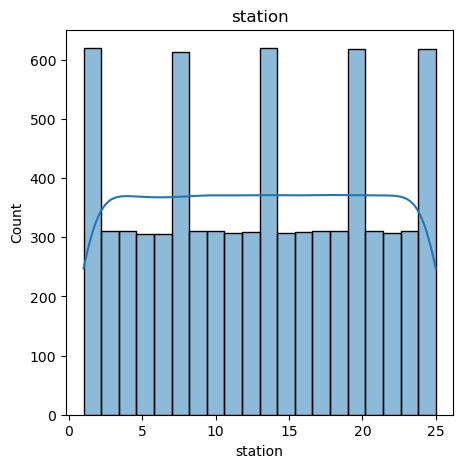

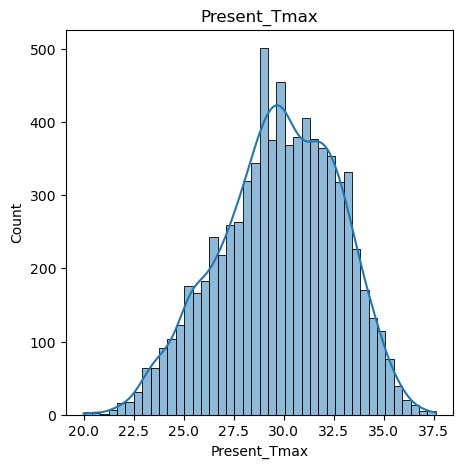

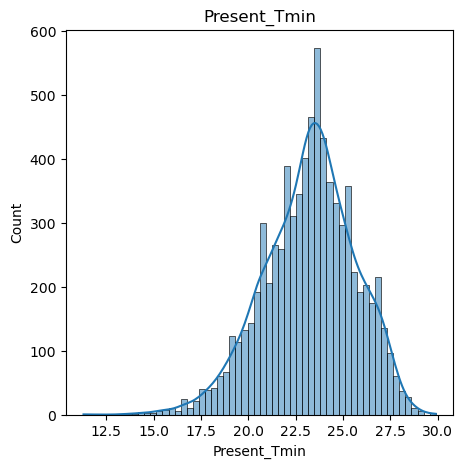

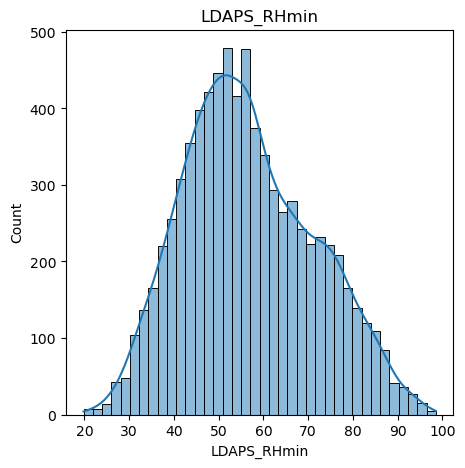

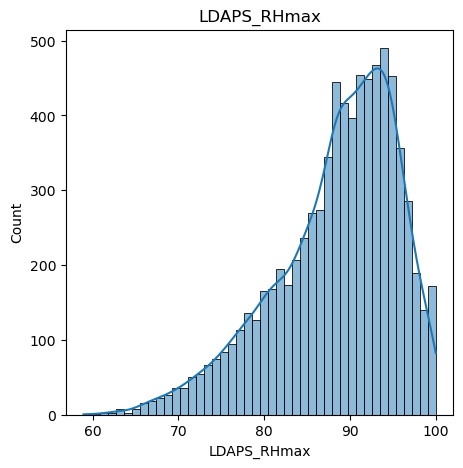

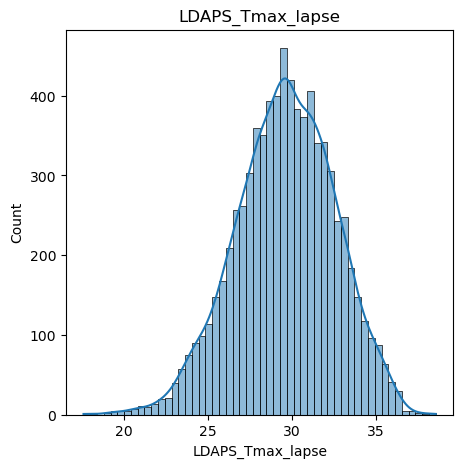

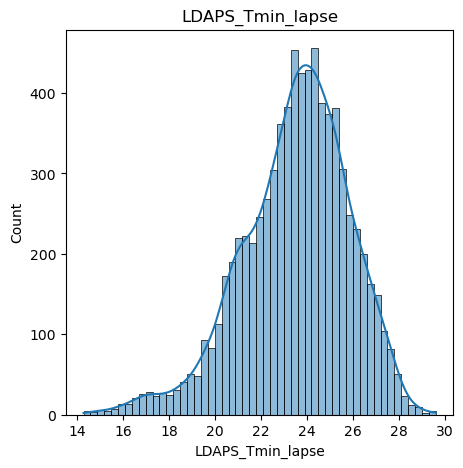

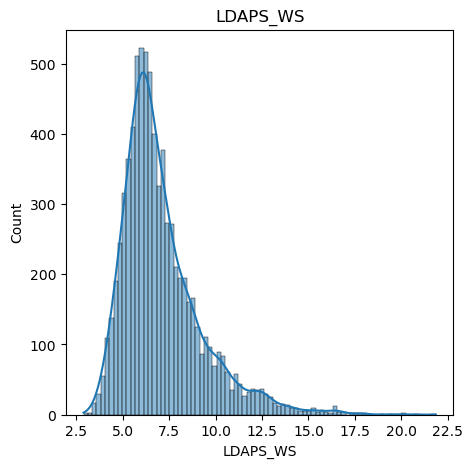

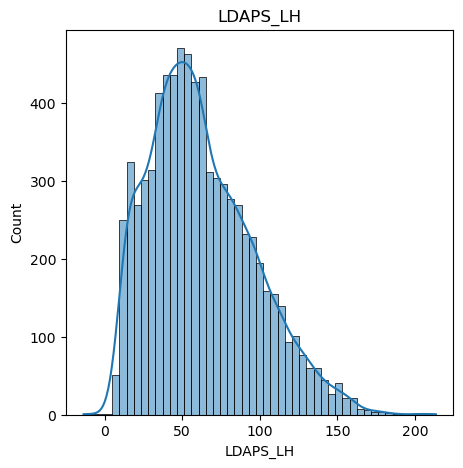

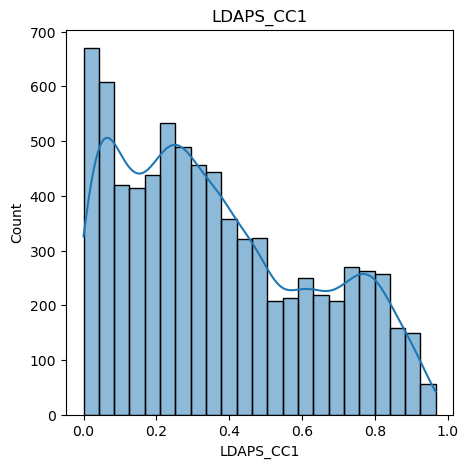

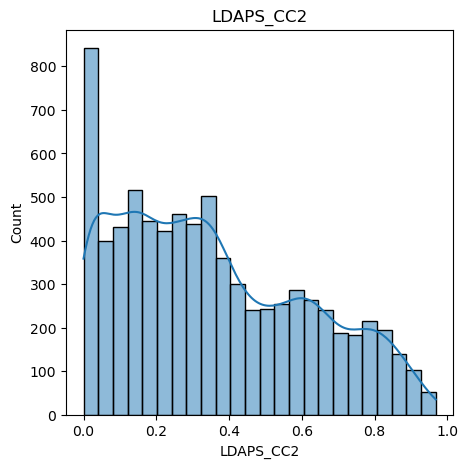

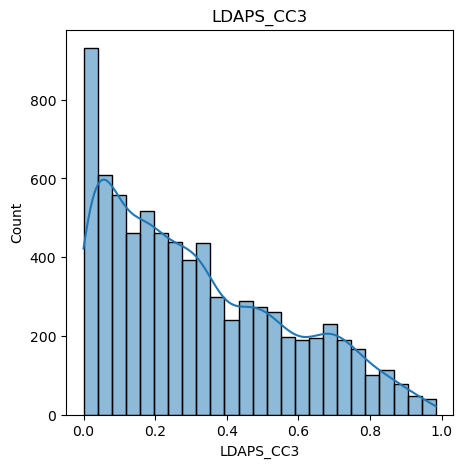

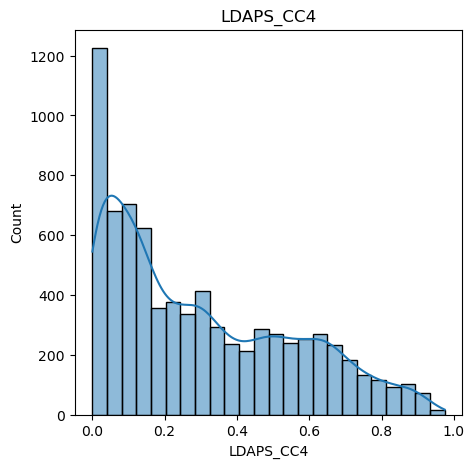

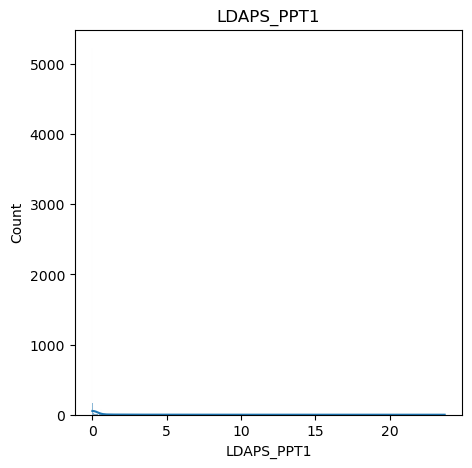

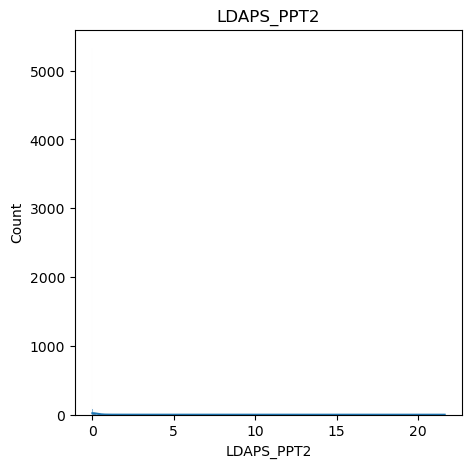

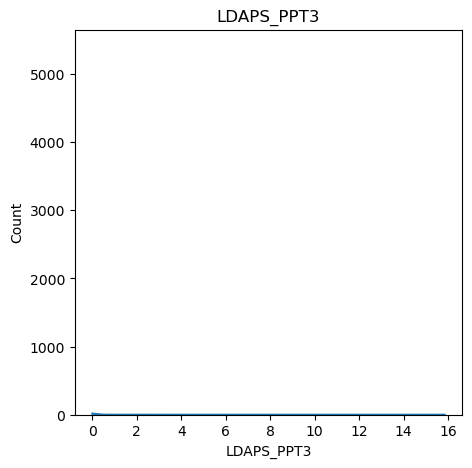

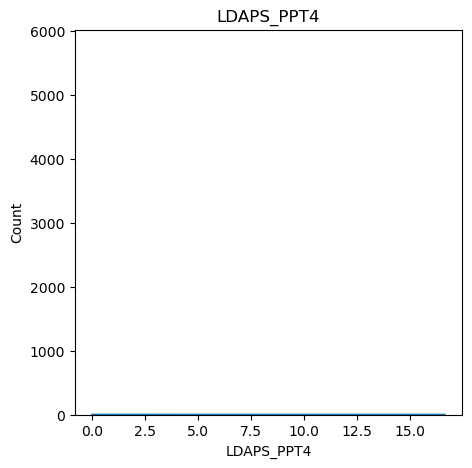

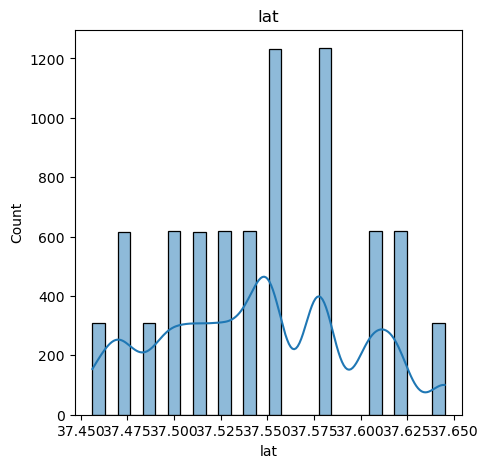

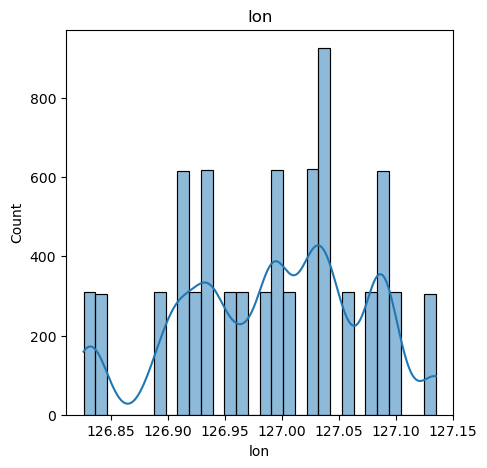

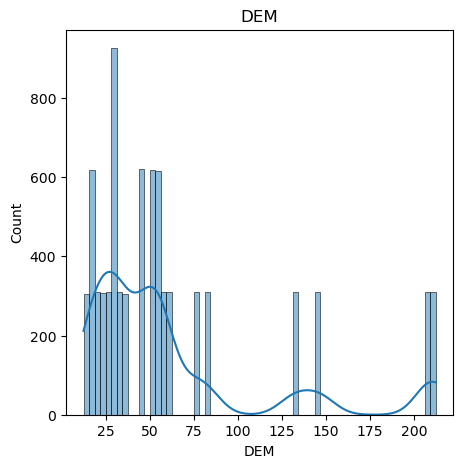

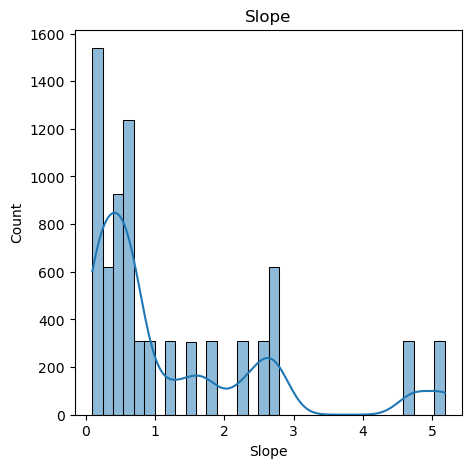

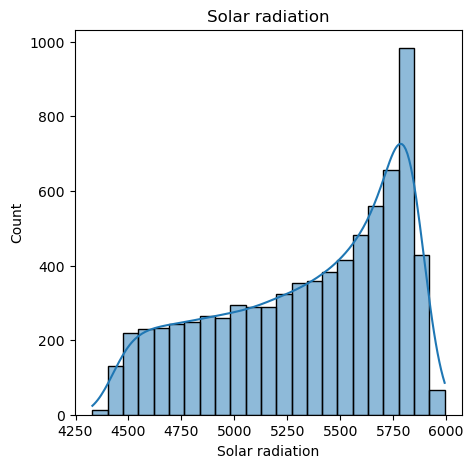

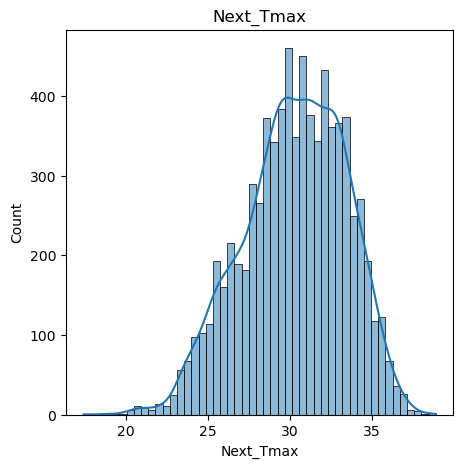

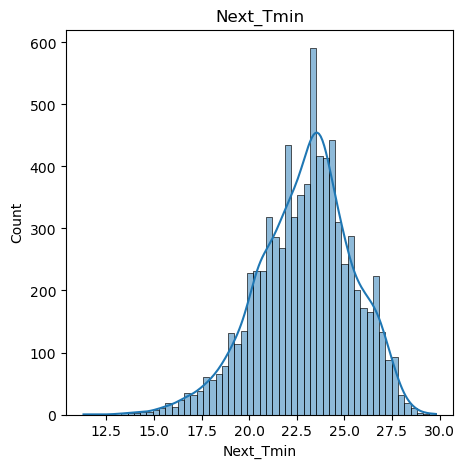

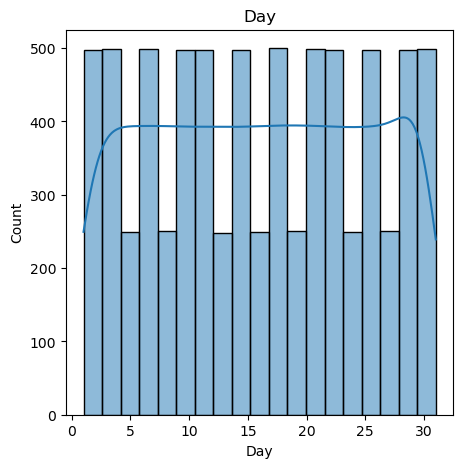

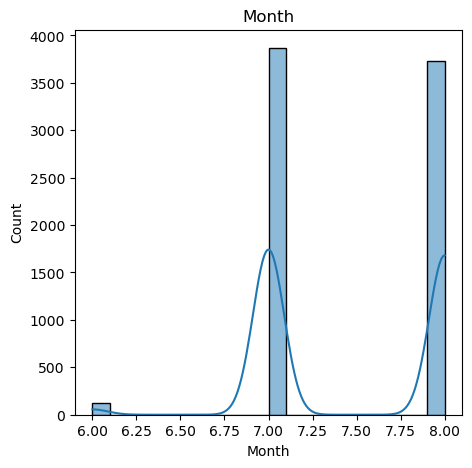

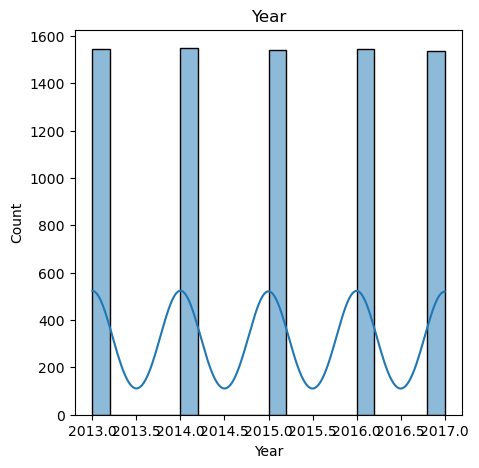

In [48]:
#Distribution of data
for column in columns:
    plt.figure(column,figsize=(10,10))
    plt.title(column)
    sns.histplot(x = column,data = temp,kde=True)
plt.show()

### Bivariate Analysis 

-- Now we shall see how the variables(features) are related to each other and what can we derive from them. Also we shall check how the independent variables are correlated to the dependent feature.

In [55]:
columns

['station',
 'Present_Tmax',
 'Present_Tmin',
 'LDAPS_RHmin',
 'LDAPS_RHmax',
 'LDAPS_Tmax_lapse',
 'LDAPS_Tmin_lapse',
 'LDAPS_WS',
 'LDAPS_LH',
 'LDAPS_CC1',
 'LDAPS_CC2',
 'LDAPS_CC3',
 'LDAPS_CC4',
 'LDAPS_PPT1',
 'LDAPS_PPT2',
 'LDAPS_PPT3',
 'LDAPS_PPT4',
 'lat',
 'lon',
 'DEM',
 'Slope',
 'Solar radiation',
 'Next_Tmax',
 'Next_Tmin',
 'Day',
 'Month',
 'Year']

<Axes: xlabel='Next_Tmax', ylabel='Present_Tmax'>

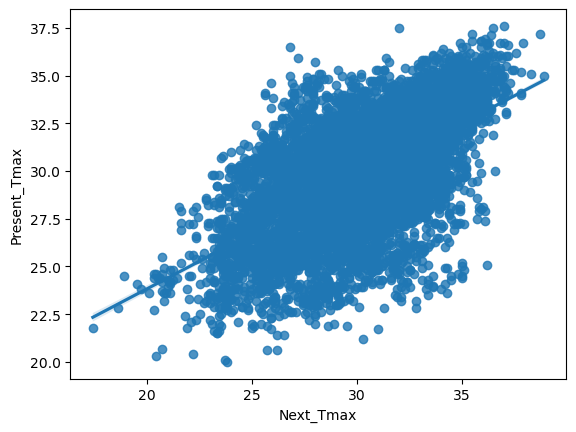

In [60]:
#Next Day max Temp vs Present day max Temp
sns.regplot(x='Next_Tmax',y='Present_Tmax',data = temp)

-- From the above regplot between Next day maximum temperature(independent variable) and Max Temperature on the present day, we see that there is a positive correlation between the two features and also the feature Present_Tmax might be helpful in the prediction process. 

<Axes: xlabel='Next_Tmin', ylabel='Present_Tmin'>

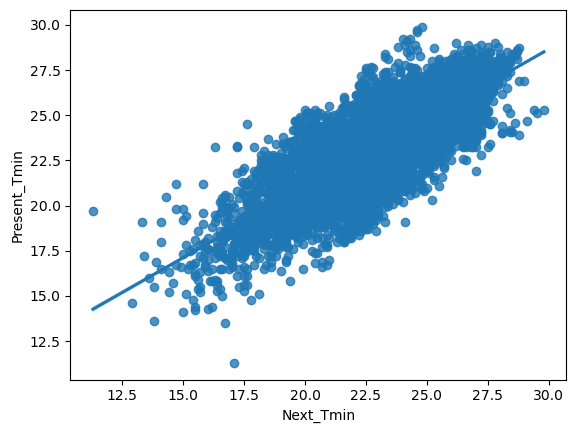

In [61]:
#Next Day min Temp vs Present day min Temp
sns.regplot(x='Next_Tmin',y='Present_Tmin',data = temp)

-- From the above regplot between Next day minimum temperature(independent variable) and Min Temperature on the present day, we see that there is a positive correlation between the two features and also the feature Present_Tmin might also be helpful in the prediction process.

<Axes: xlabel='Next_Tmax', ylabel='LDAPS_RHmax'>

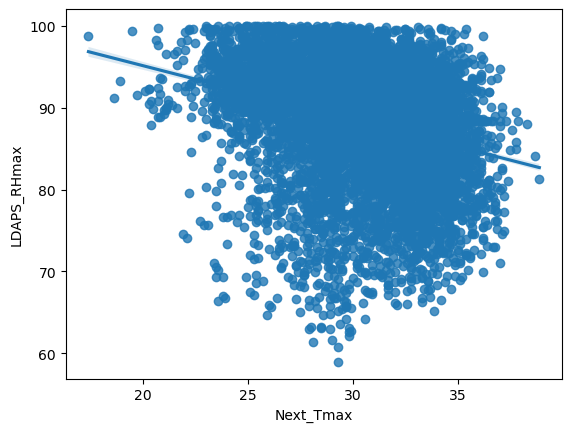

In [62]:
#Next Day max Temp vs Next day max Relative Humidity
sns.regplot(x='Next_Tmax',y='LDAPS_RHmax',data = temp)

-- From the above regplot between Next day maximum temperature(independent variable) and Next day Max Relative Humidity, we see that there is a slight negative correlation between the two features.

<Axes: xlabel='Next_Tmin', ylabel='LDAPS_RHmin'>

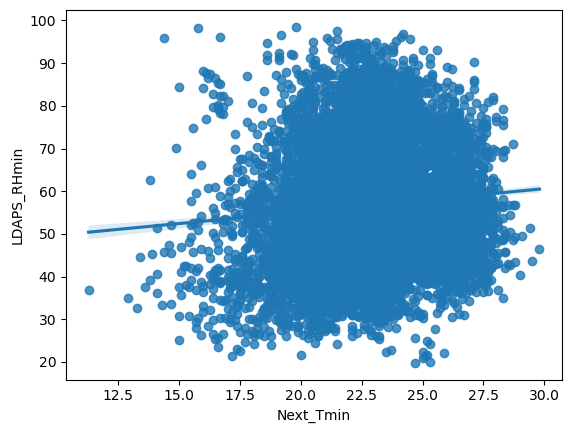

In [63]:
#Next Day min Temp vs Next day min Relative Humidity
sns.regplot(x='Next_Tmin',y='LDAPS_RHmin',data = temp)

-- From the above regplot between Next day minimum temperature(independent variable) and Next day Min Relative Humidity, we see that there is a very slight positive correlation between the two features.

<Axes: xlabel='Next_Tmax', ylabel='LDAPS_LH'>

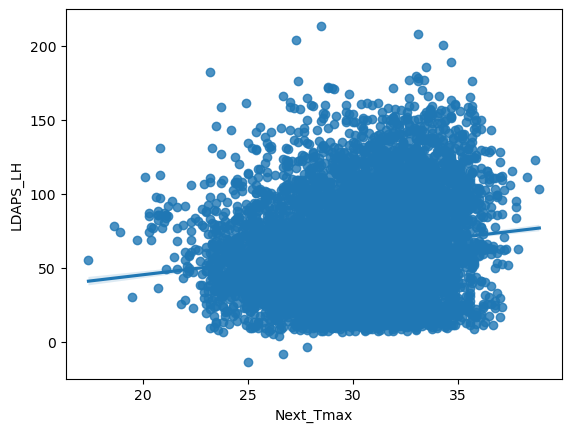

In [71]:
#Next Day max Temp vs Next day avg latent heat flux
sns.regplot(x='Next_Tmax',y='LDAPS_LH',data = temp)

-- From the above regplot between Next day maximum temperature(independent variable) and Next day Average Latent Heat Flux, we see that there is a very slight positive correlation between the two features.

<Axes: xlabel='Next_Tmin', ylabel='LDAPS_LH'>

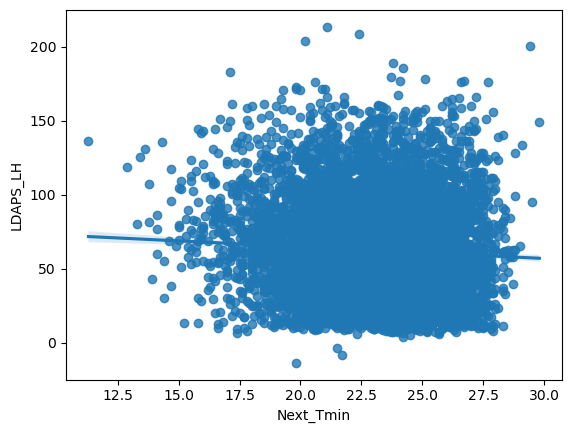

In [72]:
#Next Day min Temp vs Next day avg latent heat flux
sns.regplot(x='Next_Tmin',y='LDAPS_LH',data = temp)

-- From the above regplot between Next day minimum temperature(independent variable) and Next day Average Latent Heat Flux, we see that there is a very slight negative correlation between the two features.

## Multivariate Analysis 

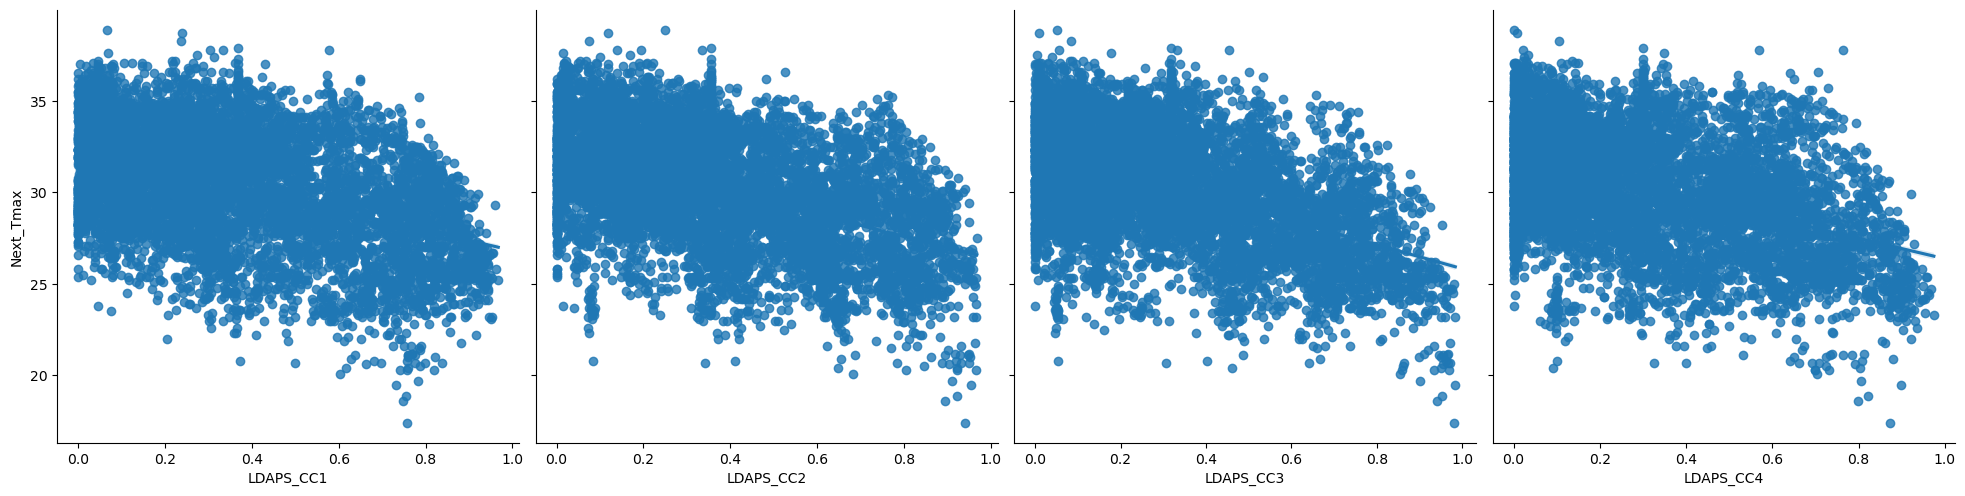

In [51]:
#Next Day max Temp vs next-day (4) 6-hour split average cloud cover
sns.pairplot(temp,x_vars = ['LDAPS_CC1','LDAPS_CC2','LDAPS_CC3','LDAPS_CC4'],y_vars = 'Next_Tmax',size=5,kind = 'reg')

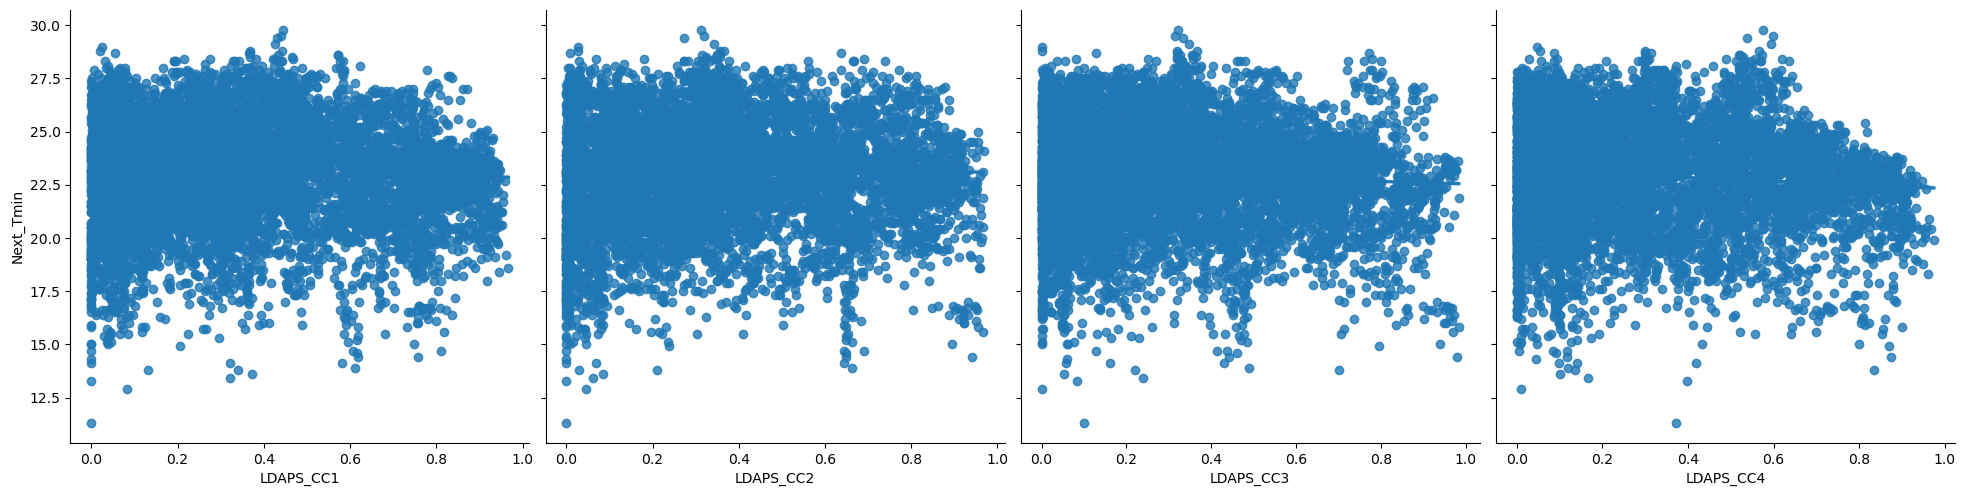

In [52]:
#Next Day min Temp vs next-day (4) 6-hour split average cloud cover
sns.pairplot(temp,x_vars = ['LDAPS_CC1','LDAPS_CC2','LDAPS_CC3','LDAPS_CC4'],y_vars = 'Next_Tmin',size=5,kind = 'reg')

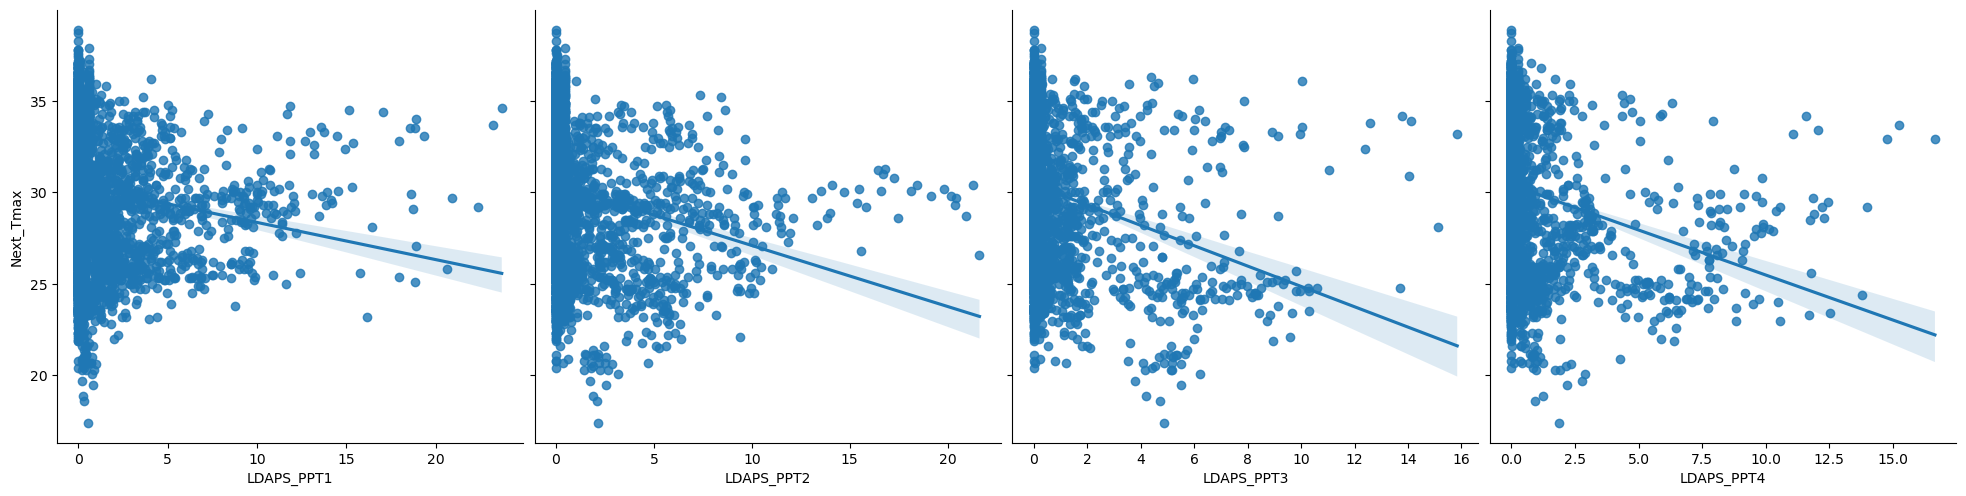

In [53]:
#Next Day max Temp vs next-day (4) 6-hour split average precipitation
sns.pairplot(temp,x_vars = ['LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4'],y_vars = 'Next_Tmax',size=5,kind = 'reg')

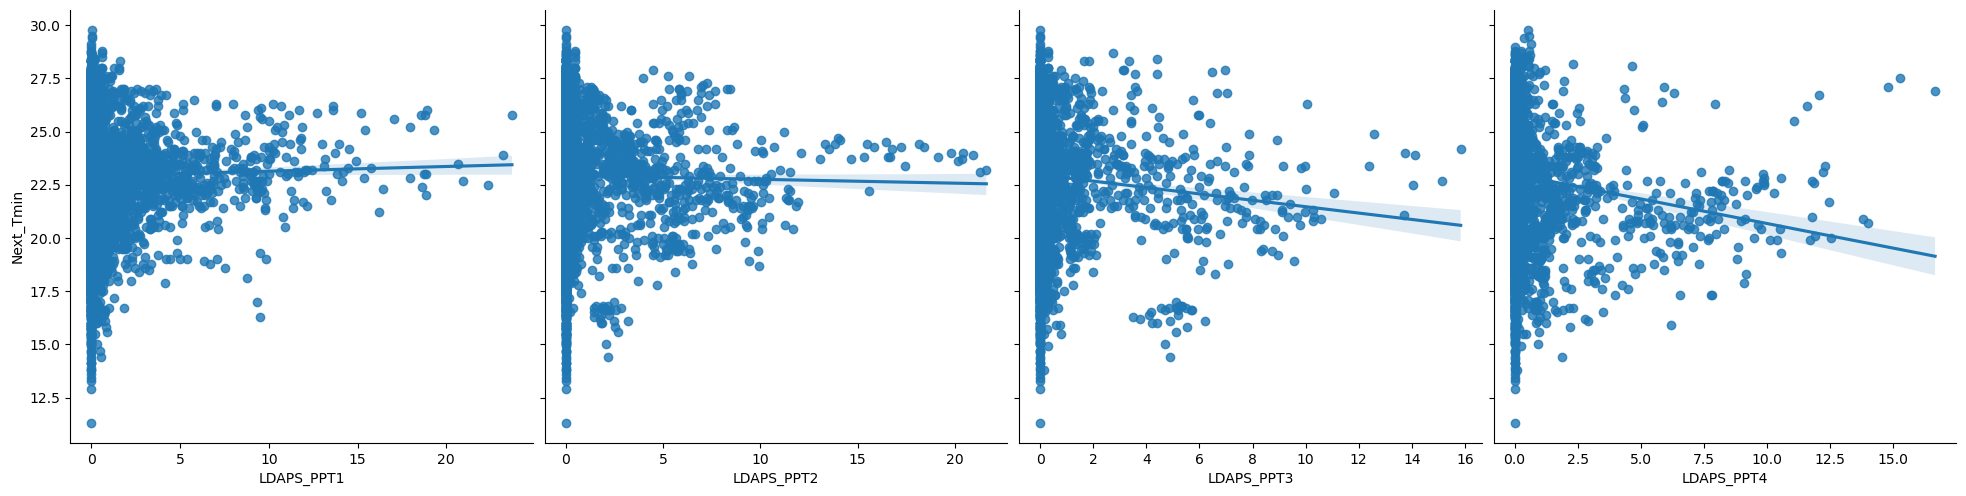

In [54]:
#Next Day min Temp vs next-day (4) 6-hour split average precipitation
sns.pairplot(temp,x_vars = ['LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4'],y_vars = 'Next_Tmin',size=5,kind = 'reg')

### Feature Engineering and Feature Selection 

In [75]:
columns

['station',
 'Present_Tmax',
 'Present_Tmin',
 'LDAPS_RHmin',
 'LDAPS_RHmax',
 'LDAPS_Tmax_lapse',
 'LDAPS_Tmin_lapse',
 'LDAPS_WS',
 'LDAPS_LH',
 'LDAPS_CC1',
 'LDAPS_CC2',
 'LDAPS_CC3',
 'LDAPS_CC4',
 'LDAPS_PPT1',
 'LDAPS_PPT2',
 'LDAPS_PPT3',
 'LDAPS_PPT4',
 'lat',
 'lon',
 'DEM',
 'Slope',
 'Solar radiation',
 'Next_Tmax',
 'Next_Tmin',
 'Day',
 'Month',
 'Year']

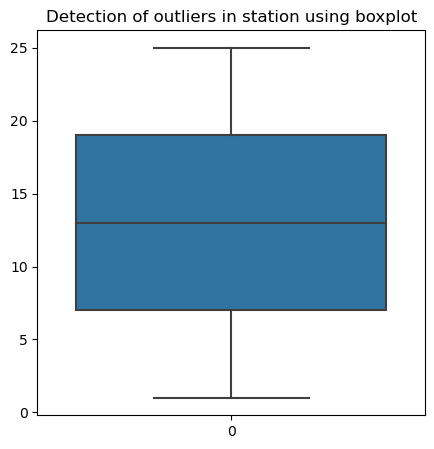

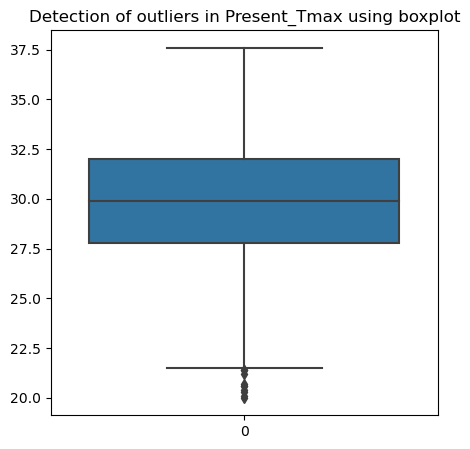

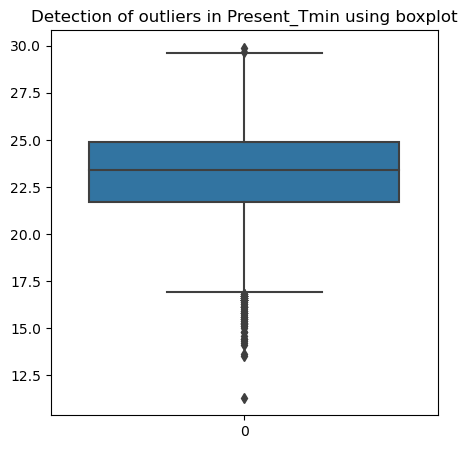

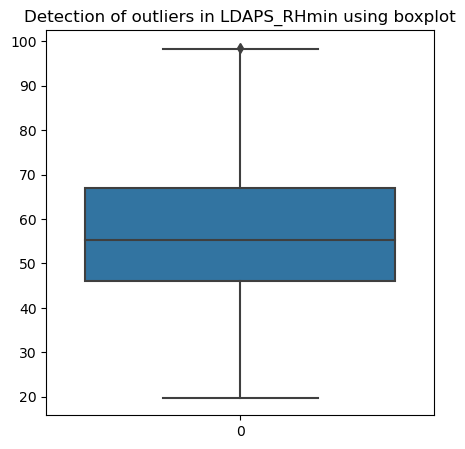

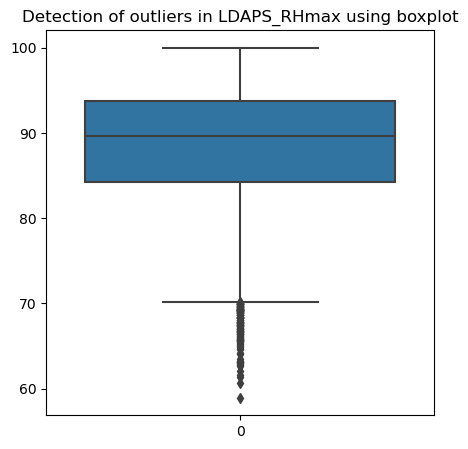

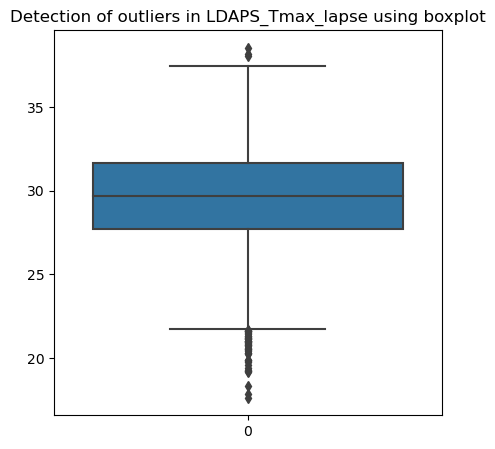

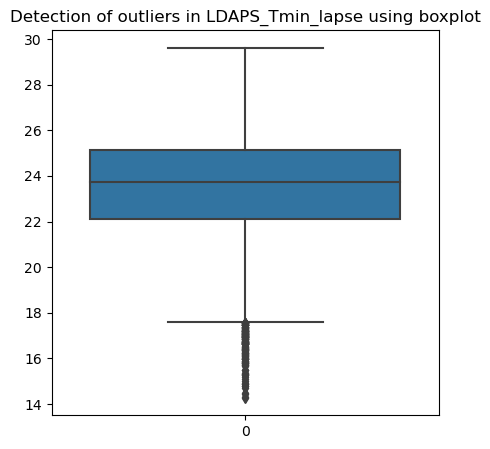

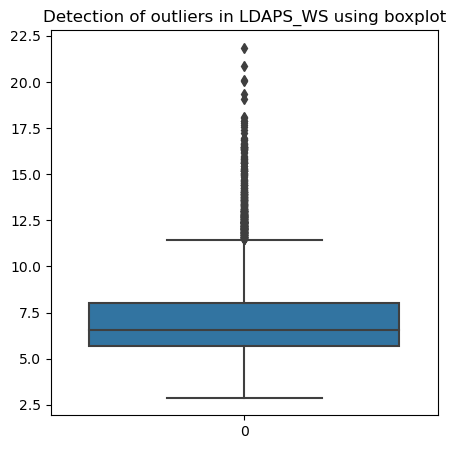

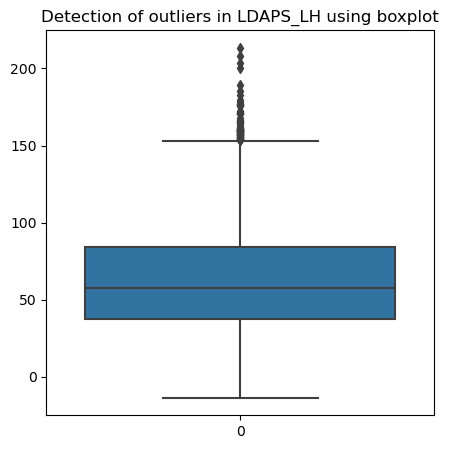

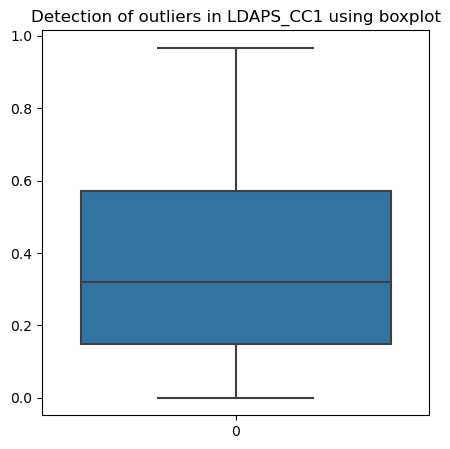

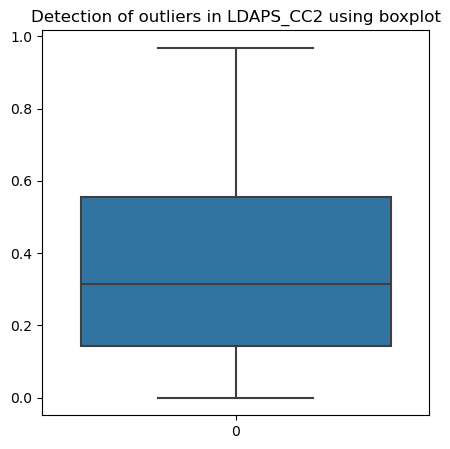

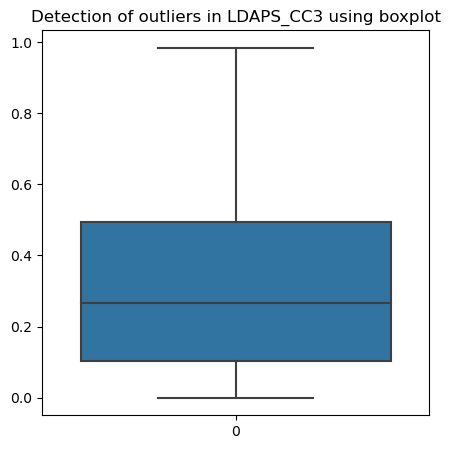

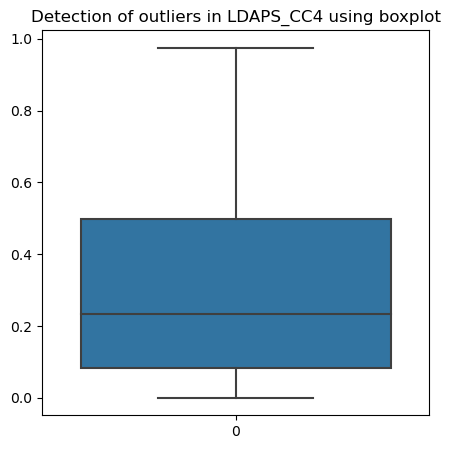

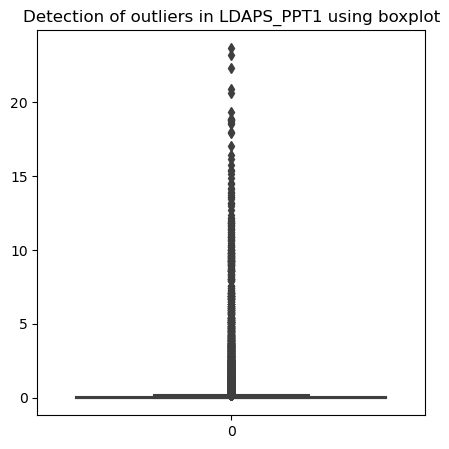

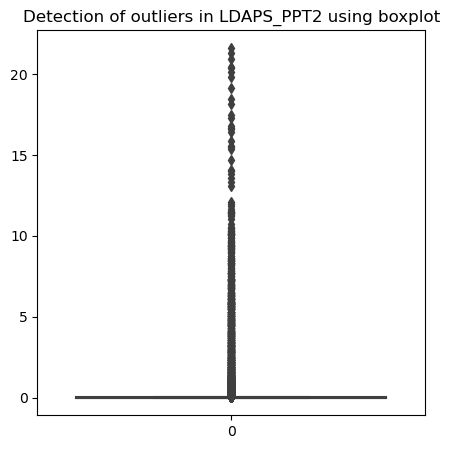

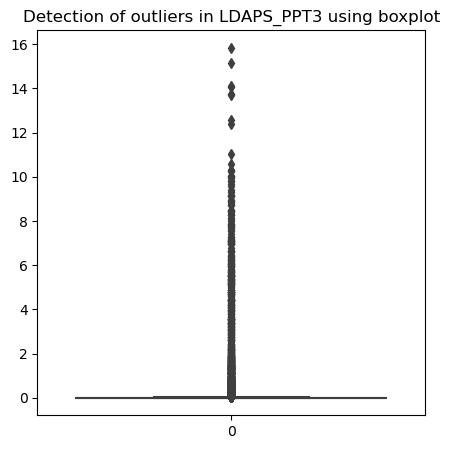

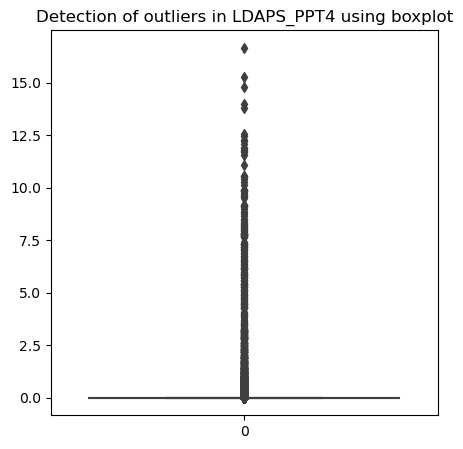

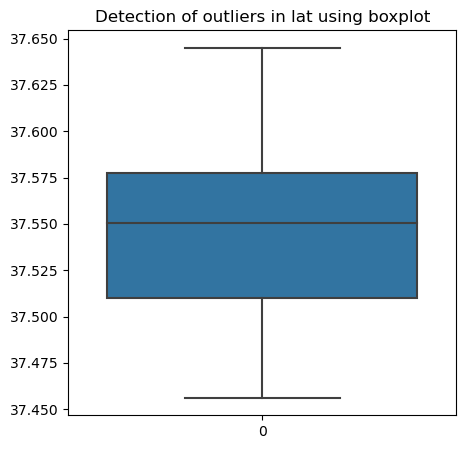

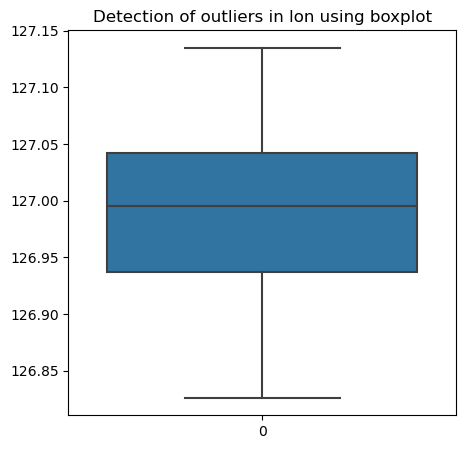

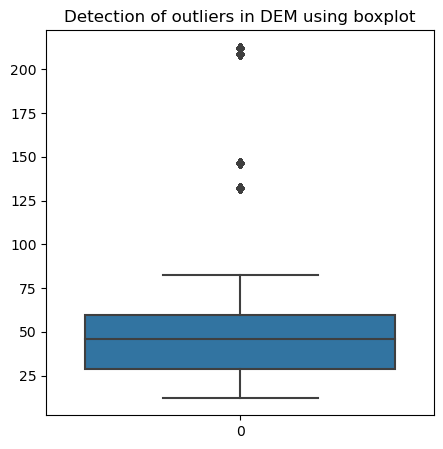

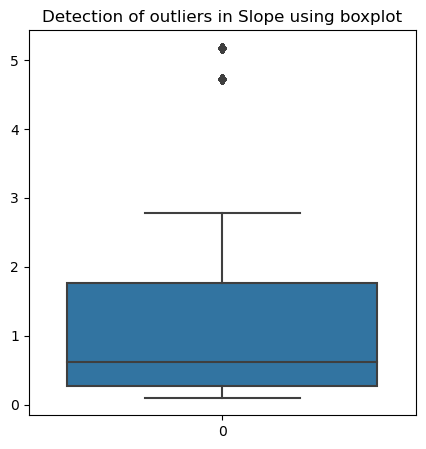

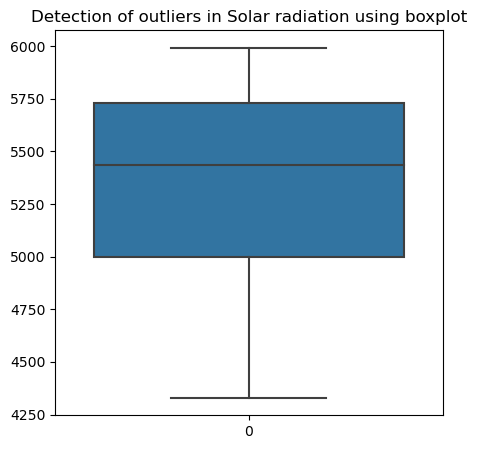

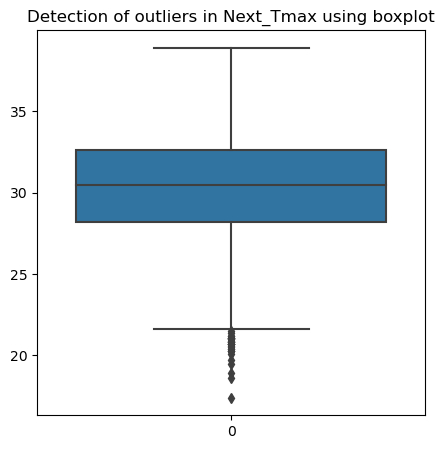

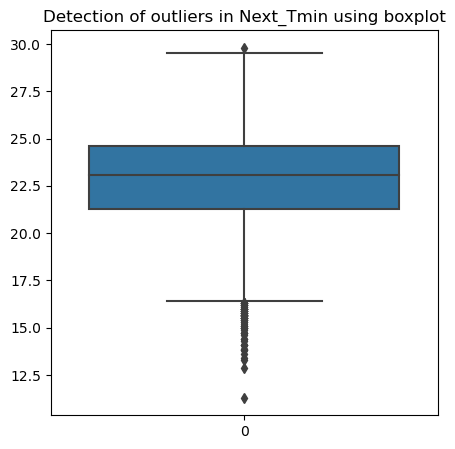

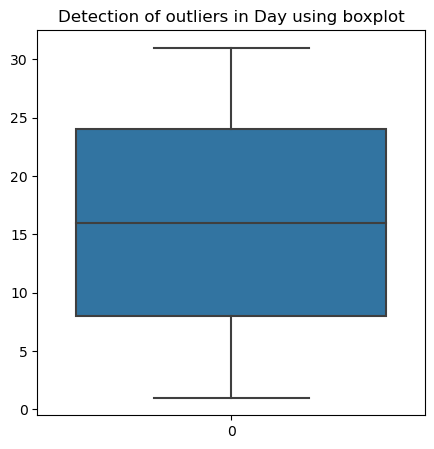

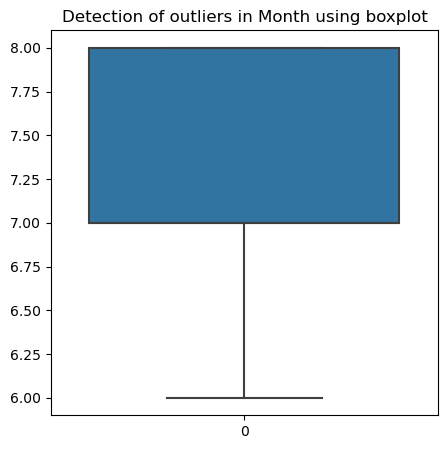

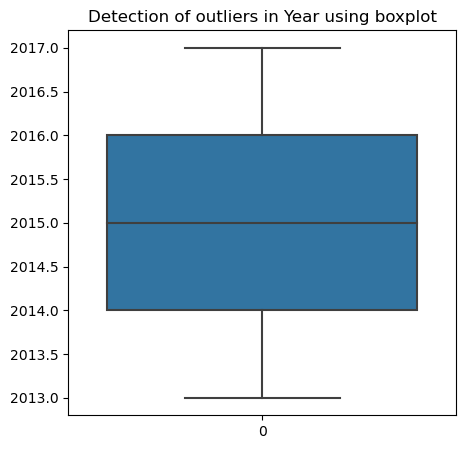

In [77]:
#Now let's detect outliers from the dataset and remove them only if needed..
for column in columns:
    plt.figure(figsize=(5,5))
    sns.boxplot(temp[column])
    plt.title('Detection of outliers in {} using boxplot'.format(column))
plt.show()

-- The data recorded is pretty accurate, the outliers that we see from the above boxplots are all realistic and is within the range (mentioned in the attribute information above). Therefore, we shall not be remmoving any outliers.

#### Correlation Analysis 

In [79]:
#Correlation among numerical columns
temp_cor = temp.corr()
temp_cor

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
station           1.000000      0.113069      0.132188    -0.068285   
Present_Tmax      0.113069      1.000000      0.617749    -0.206945   
Present_Tmin      0.132188      0.617749      1.000000     0.120546   
LDAPS_RHmin      -0.068285     -0.206945      0.120546     1.000000   
LDAPS_RHmax      -0.168195     -0.304554     -0.018340     0.578708   
LDAPS_Tmax_lapse  0.070062      0.568925      0.462182    -0.568968   
LDAPS_Tmin_lapse  0.104919      0.623176      0.762386     0.086273   
LDAPS_WS          0.004444     -0.124895     -0.038291     0.291812   
LDAPS_LH         -0.132215      0.133118     -0.012656    -0.072808   
LDAPS_CC1         0.005876     -0.313528      0.083299     0.613201   
LDAPS_CC2         0.002184     -0.215106      0.088957     0.744980   
LDAPS_CC3        -0.000413     -0.144972     -0.004615     0.688652   
LDAPS_CC4         0.005160     -0.141378     -0.045932     0.512801   
LDAPS_PPT1       -0.003539     -0.113856      0.110159     0.260374   
LDAPS_PPT2       -0.009600     -0.103744      0.065346     0.390614   
LDAPS_PPT3       -0.014191     -0.126270     -0.051803     0.237664   
LDAPS_PPT4       -0.011564     -0.105270     -0.068777     0.165221   
lat              -0.238460     -0.054255     -0.080913     0.085414   
lon              -0.118755      0.007439     -0.045411    -0.077668   
DEM              -0.257215     -0.188650     -0.252359     0.101430   
Slope            -0.091449     -0.106727     -0.147869     0.122570   
Solar radiation  -0.020255     -0.026798      0.051451     0.242471   
Next_Tmax         0.108306      0.609839      0.470231    -0.442559   
Next_Tmin         0.128719      0.622235      0.796415     0.092980   
Day              -0.000125     -0.142020     -0.105912    -0.062389   
Month             0.001340      0.145956      0.087543    -0.188938   
Year              0.001081      0.061012      0.038131    -0.002796   

                  LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  \
station             -0.168195          0.070062          0.104919  0.004444   
Present_Tmax        -0.304554          0.568925          0.623176 -0.124895   
Present_Tmin        -0.018340          0.462182          0.762386 -0.038291   
LDAPS_RHmin          0.578708         -0.568968          0.086273  0.291812   
LDAPS_RHmax          1.000000         -0.377209         -0.117417  0.132796   
LDAPS_Tmax_lapse    -0.377209          1.000000          0.653320 -0.316285   
LDAPS_Tmin_lapse    -0.117417          0.653320          1.000000 -0.133353   
LDAPS_WS             0.132796         -0.316285         -0.133353  1.000000   
LDAPS_LH             0.237706          0.044499         -0.138403  0.003230   
LDAPS_CC1            0.436276         -0.440665          0.008993  0.287090   
LDAPS_CC2            0.391003         -0.526132          0.045908  0.258623   
LDAPS_CC3            0.225859         -0.543809         -0.045772  0.239415   
LDAPS_CC4            0.129282         -0.431253         -0.081777  0.218480   
LDAPS_PPT1           0.268282         -0.116574          0.034450  0.143133   
LDAPS_PPT2           0.228162         -0.249063         -0.002782  0.183197   
LDAPS_PPT3           0.132484         -0.194624         -0.093480  0.148422   
LDAPS_PPT4           0.115835         -0.166970         -0.099826  0.132244   
lat                  0.194563         -0.044057         -0.098540  0.033959   
lon                  0.024993          0.090174         -0.026887 -0.063031   
DEM                  0.176848         -0.180786         -0.196883  0.189009   
Slope                0.218913         -0.163377         -0.186902  0.168964   
Solar radiation      0.147964          0.046252          0.157898  0.121235   
Next_Tmax           -0.287549          0.828254          0.586748 -0.348693   
Next_Tmin           -0.075360          0.586562          0.881343 -0.100930   
Day                 -0.014775         -0.159833        

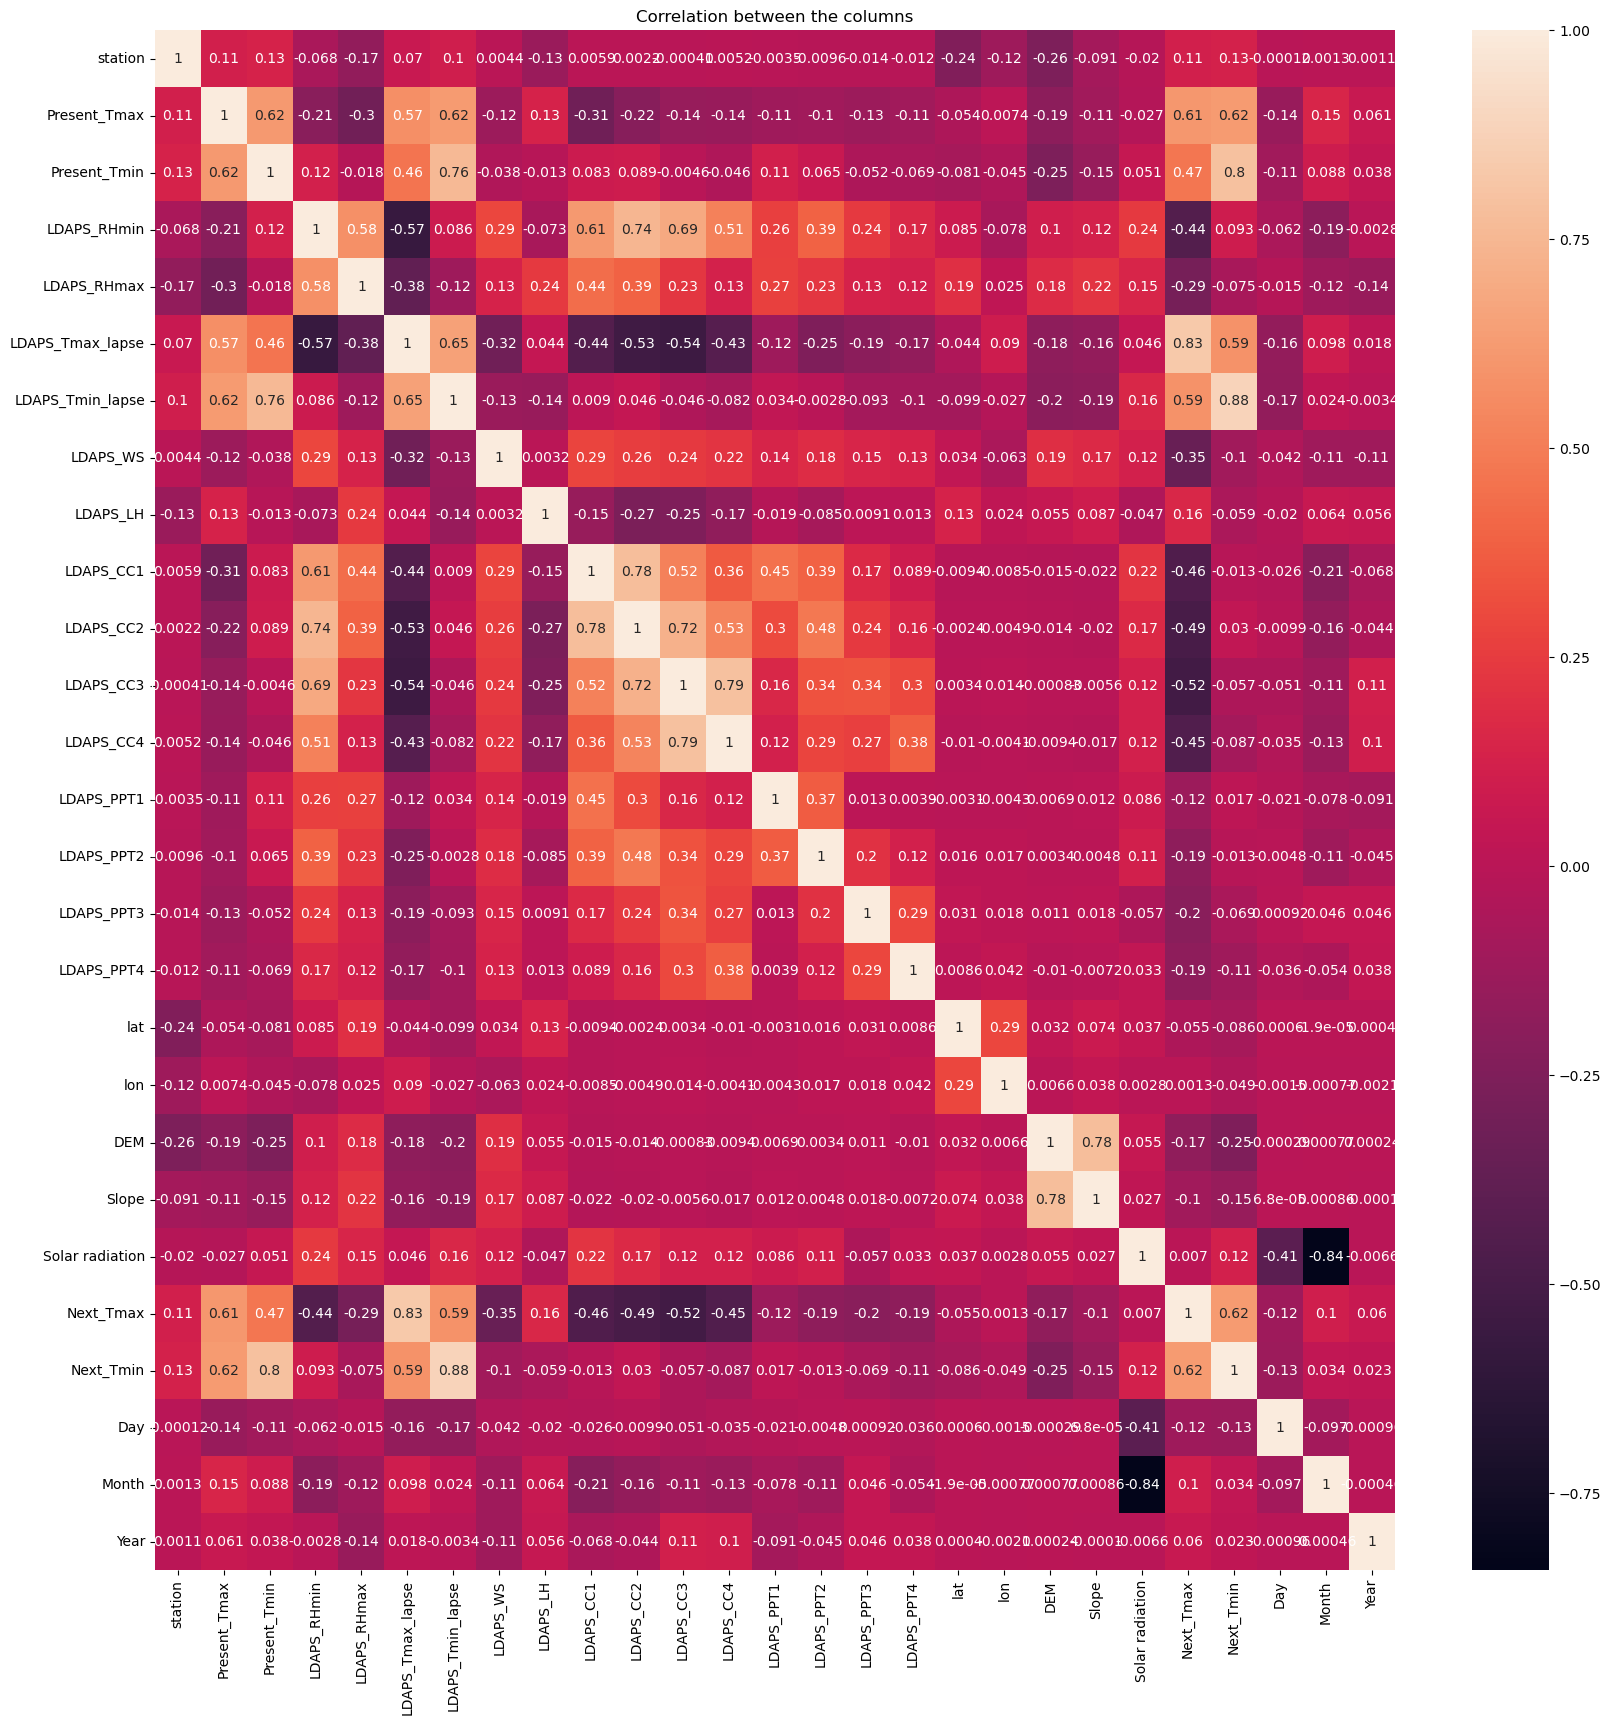

In [80]:
plt.figure(figsize=(20,20))
sns.heatmap(temp_cor, annot = True)
plt.title("Correlation between the columns")
plt.show()

In [211]:
temp

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0         1.0          28.7          21.4    58.255688    91.116364   
1         2.0          31.9          21.6    52.263397    90.604721   
2         3.0          31.6          23.3    48.690479    83.973587   
3         4.0          32.0          23.4    58.239788    96.483688   
4         5.0          31.4          21.9    56.174095    90.155128   
...       ...           ...           ...          ...          ...   
7745     21.0          23.1          17.8    24.688997    78.261383   
7746     22.0          22.5          17.4    30.094858    83.690018   
7747     23.0          23.3          17.1    26.741310    78.869858   
7748     24.0          23.3          17.7    24.040634    77.294975   
7749     25.0          23.2          17.4    22.933014    77.243744   

      LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  LDAPS_CC1  \
0            28.074101         23.006936  6.818887   69.451805   0.233947   
1            29.850689         24.035009  5.691890   51.937448   0.225508   
2            30.091292         24.565633  6.138224   20.573050   0.209344   
3            29.704629         23.326177  5.650050   65.727144   0.216372   
4            29.113934         23.486480  5.735004  107.965535   0.151407   
...                ...               ...       ...         ...        ...   
7745         27.812697         18.303014  6.603253    9.614074   0.052902   
7746         26.704905         17.814038  5.768083   82.146707   0.066461   
7747         26.352081         18.775678  6.148918   72.058294   0.030034   
7748         27.010193         18.733519  6.542819   47.241457   0.035874   
7749         27.939516         18.522965  7.289264    9.090034   0.048954   

      ...      lat      lon       DEM   Slope  Solar radiation  Next_Tmax  \
0     ...  37.6046  126.991  212.3350  2.7850      5992.895996       29.1   
1     ...  37.6046  127.032   44.7624  0.5141      5869.312500       30.5   
2     ...  37.5776  127.058   33.3068  0.2661      5863.555664       31.1   
3     ...  37.6450  127.022   45.7160  2.5348      5856.964844       31.7   
4     ...  37.5507  127.135   35.0380  0.5055      5859.552246       31.2   
...   ...      ...      ...       ...     ...              ...        ...   
7745  ...  37.5507  127.040   26.2980  0.5721      4456.024414       27.6   
7746  ...  37.5102  127.086   21.9668  0.1332      4441.803711       28.0   
7747  ...  37.5372  126.891   15.5876  0.1554      4443.313965       28.3   
7748  ...  37.5237  126.909   17.2956  0.2223      4438.373535       28.6   
7749  ...  37.5237  126.970   19.5844  0.2713      4451.345215       27.8   

      Next_Tmin  Day  Month  Year  
0          21.2   30      6  2013  
1          22.5   30      6  2013  
2          23.9   30      6  2013  
3          24.3   30      6  2013  
4          22.5   30      6  2013  
...         ...  ...    ...   ...  
7745       17.7   30      8  2017  
7746       17.1   30      8  2017  
7747       18.1   30      8  2017  
7748       18.8   30      8  2017  
7749       17.4   30      8  2017  

[7723 rows x 27 columns]

-- Removing the columns 'LDAPS_CC1','LDAPS_CC2','LDAPS_CC3' and 'LDAPS_CC4' as they are multicollinear with each other and very negatively correlated with the target variable.

In [212]:
temp.drop('LDAPS_CC1', axis=1, inplace = True)
temp.drop('LDAPS_CC2', axis=1, inplace = True)
temp.drop('LDAPS_CC3', axis=1, inplace = True)
temp.drop('LDAPS_CC4', axis=1, inplace = True)

In [213]:
#Dropping the 'DEM' and 'slope' columns as it is highly collinear with each other
temp.drop('DEM', axis=1, inplace = True)
temp.drop('Slope', axis=1, inplace = True)

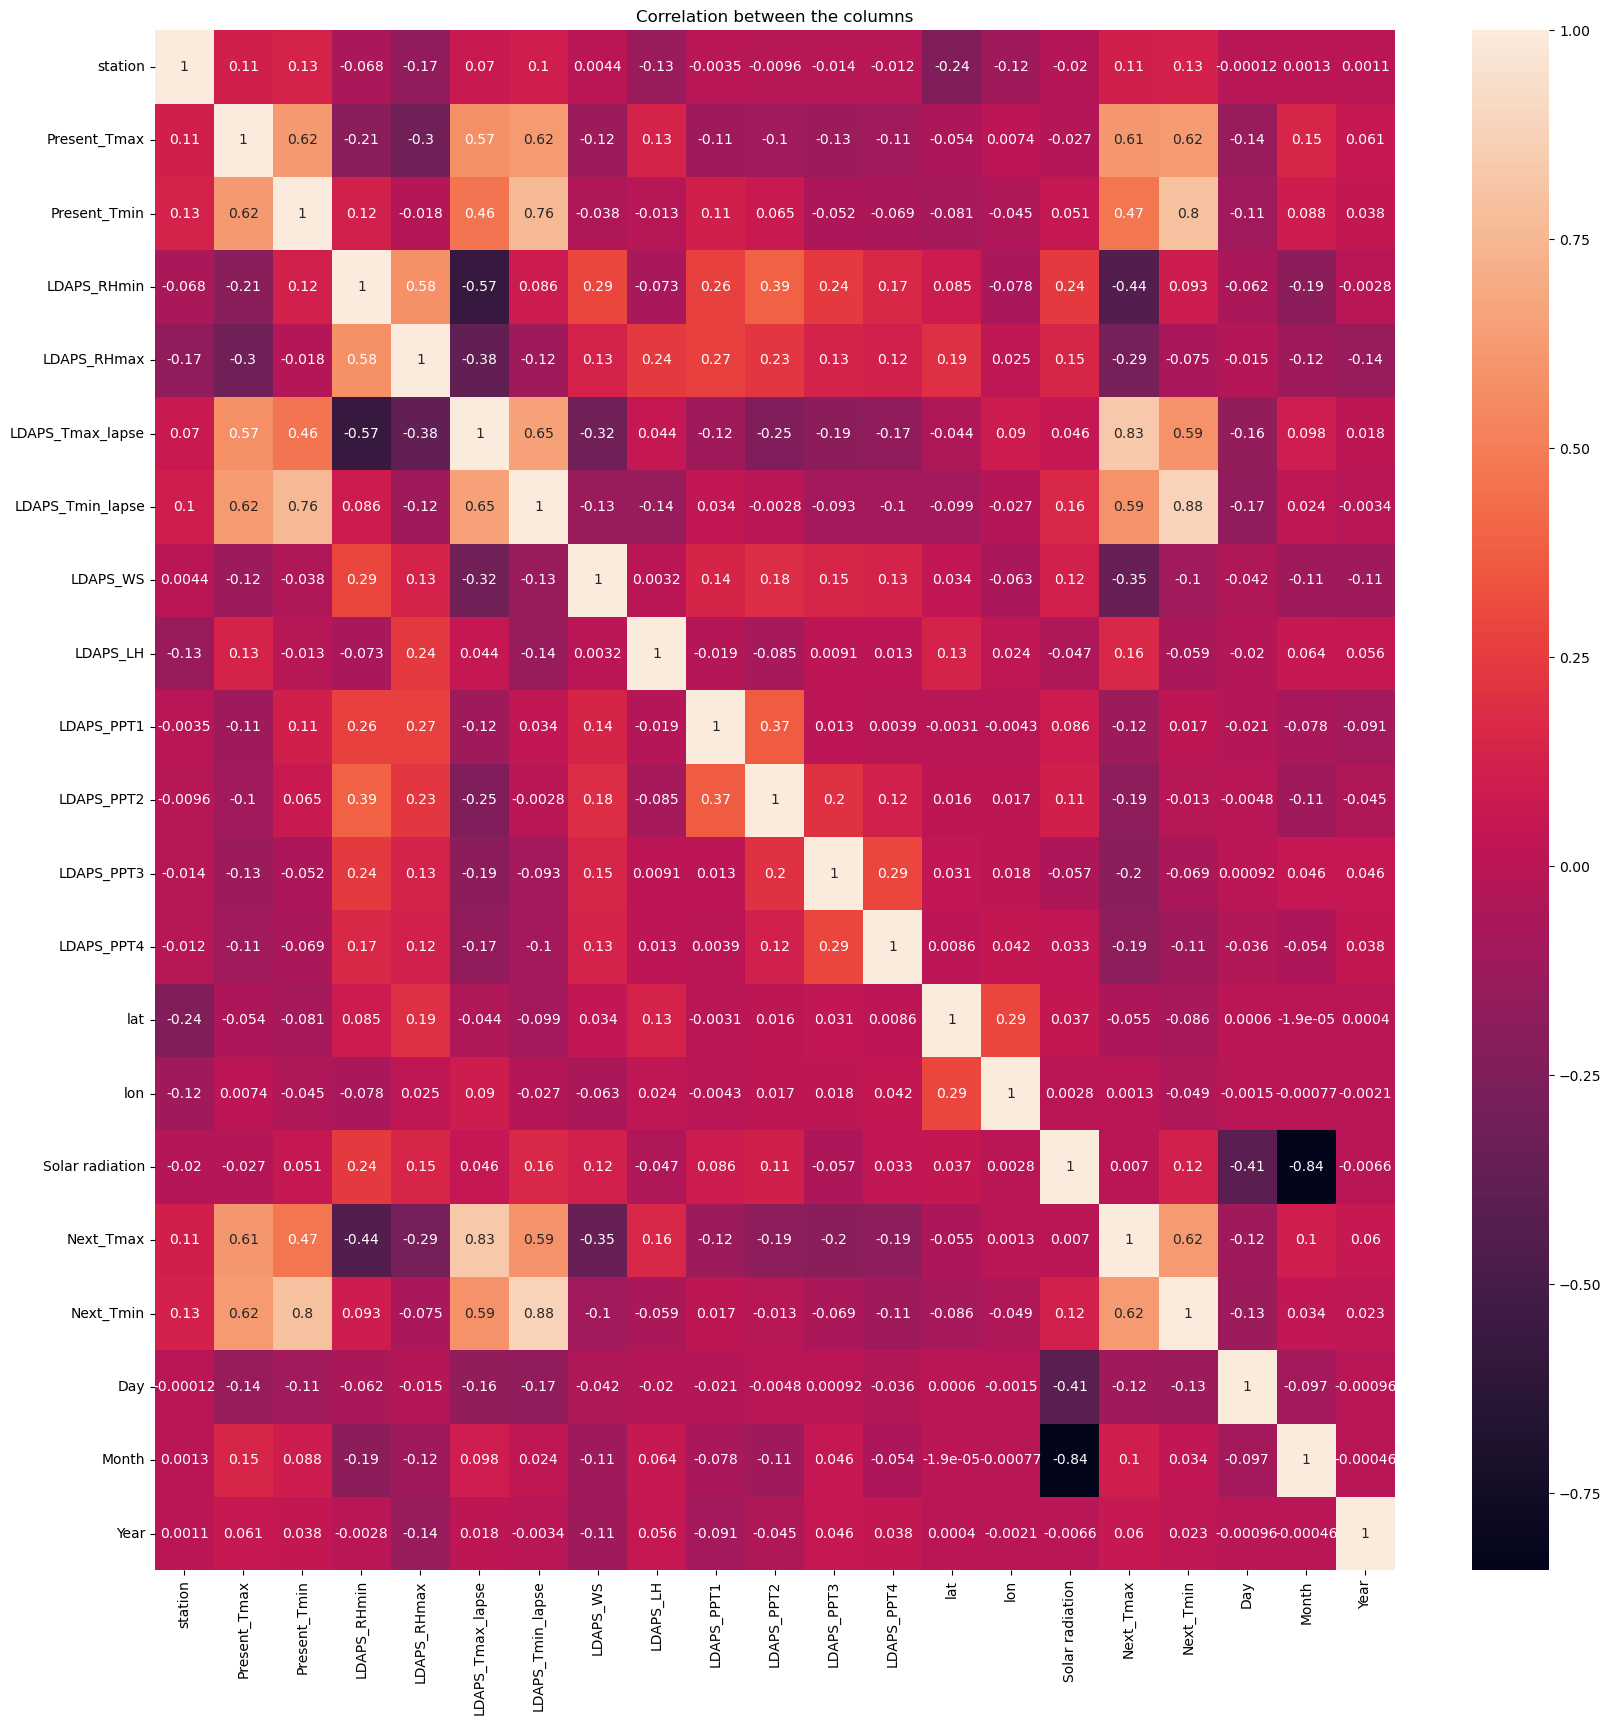

In [87]:
#Again Checking for correlation
temp_cor = temp.corr()
plt.figure(figsize=(20,20))
sns.heatmap(temp_cor, annot = True)
plt.title("Correlation between the columns")
plt.show()

In [214]:
#Checking for skewness
temp.skew()

station            -0.002773
Present_Tmax       -0.263625
Present_Tmin       -0.356544
LDAPS_RHmin         0.302969
LDAPS_RHmax        -0.849762
LDAPS_Tmax_lapse   -0.223709
LDAPS_Tmin_lapse   -0.577906
LDAPS_WS            1.558527
LDAPS_LH            0.666802
LDAPS_PPT1          5.329705
LDAPS_PPT2          5.720478
LDAPS_PPT3          6.379430
LDAPS_PPT4          6.751450
lat                 0.086467
lon                -0.286647
Solar radiation    -0.513584
Next_Tmax          -0.335372
Next_Tmin          -0.396184
Day                -0.008981
Month              -0.193597
Year                0.002105
dtype: float64

In [217]:
#Removing skewness
temp['LDAPS_PPT1'] = np.cbrt(temp['LDAPS_PPT1'])
temp['LDAPS_PPT2'] = np.cbrt(temp['LDAPS_PPT2'])
temp['LDAPS_PPT3'] = np.cbrt(temp['LDAPS_PPT3'])
temp['LDAPS_PPT4'] = np.cbrt(temp['LDAPS_PPT4'])

In [218]:
#Again Checking Skewness
temp.skew()

station            -0.002773
Present_Tmax       -0.263625
Present_Tmin       -0.356544
LDAPS_RHmin         0.302969
LDAPS_RHmax        -0.849762
LDAPS_Tmax_lapse   -0.223709
LDAPS_Tmin_lapse   -0.577906
LDAPS_WS            1.558527
LDAPS_LH            0.666802
LDAPS_PPT1          0.833966
LDAPS_PPT2          1.019687
LDAPS_PPT3          1.101645
LDAPS_PPT4          1.411576
lat                 0.086467
lon                -0.286647
Solar radiation    -0.513584
Next_Tmax          -0.335372
Next_Tmin          -0.396184
Day                -0.008981
Month              -0.193597
Year                0.002105
dtype: float64

-- Skewness removed successfully..

### Data Pre-Processing 

In [93]:
temp

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0         1.0          28.7          21.4    58.255688    91.116364   
1         2.0          31.9          21.6    52.263397    90.604721   
2         3.0          31.6          23.3    48.690479    83.973587   
3         4.0          32.0          23.4    58.239788    96.483688   
4         5.0          31.4          21.9    56.174095    90.155128   
...       ...           ...           ...          ...          ...   
7745     21.0          23.1          17.8    24.688997    78.261383   
7746     22.0          22.5          17.4    30.094858    83.690018   
7747     23.0          23.3          17.1    26.741310    78.869858   
7748     24.0          23.3          17.7    24.040634    77.294975   
7749     25.0          23.2          17.4    22.933014    77.243744   

      LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  LDAPS_PPT1  \
0            28.074101         23.006936  6.818887   69.451805         0.0   
1            29.850689         24.035009  5.691890   51.937448         0.0   
2            30.091292         24.565633  6.138224   20.573050         0.0   
3            29.704629         23.326177  5.650050   65.727144         0.0   
4            29.113934         23.486480  5.735004  107.965535         0.0   
...                ...               ...       ...         ...         ...   
7745         27.812697         18.303014  6.603253    9.614074         0.0   
7746         26.704905         17.814038  5.768083   82.146707         0.0   
7747         26.352081         18.775678  6.148918   72.058294         0.0   
7748         27.010193         18.733519  6.542819   47.241457         0.0   
7749         27.939516         18.522965  7.289264    9.090034         0.0   

      LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon  Solar radiation  \
0            0.0         0.0         0.0  37.6046  126.991      5992.895996   
1            0.0         0.0         0.0  37.6046  127.032      5869.312500   
2            0.0         0.0         0.0  37.5776  127.058      5863.555664   
3            0.0         0.0         0.0  37.6450  127.022      5856.964844   
4            0.0         0.0         0.0  37.5507  127.135      5859.552246   
...          ...         ...         ...      ...      ...              ...   
7745         0.0         0.0         0.0  37.5507  127.040      4456.024414   
7746         0.0         0.0         0.0  37.5102  127.086      4441.803711   
7747         0.0         0.0         0.0  37.5372  126.891      4443.313965   
7748         0.0         0.0         0.0  37.5237  126.909      4438.373535   
7749         0.0         0.0         0.0  37.5237  126.970      4451.345215   

      Next_Tmax  Next_Tmin  Day  Month  Year  
0          29.1       21.2   30      6  2013  
1          30.5       22.5   30      6  2013  
2          31.1       23.9   30      6  2013  
3          31.7       24.3   30      6  2013  
4          31.2       22.5   30      6  2013  
...         ...        ...  ...    ...   ...  
7745       27.6       17.7   30      8  2017  
7746       28.0       17.1   30      8  2017  
7747       28.3       18.1   30      8  2017  
7748       28.6       18.8   30      8  2017  
7749       27.8       17.4   30      8  2017  

[7723 rows x 21 columns]

-- First we predict the next-day maximum air temperature (i.e Next_Tmax), then we predict the next-day minimum air temperature(i.e Next_Tmin).

In [219]:
temp_1 = temp.copy()

In [220]:
temp_1

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0         1.0          28.7          21.4    58.255688    91.116364   
1         2.0          31.9          21.6    52.263397    90.604721   
2         3.0          31.6          23.3    48.690479    83.973587   
3         4.0          32.0          23.4    58.239788    96.483688   
4         5.0          31.4          21.9    56.174095    90.155128   
...       ...           ...           ...          ...          ...   
7745     21.0          23.1          17.8    24.688997    78.261383   
7746     22.0          22.5          17.4    30.094858    83.690018   
7747     23.0          23.3          17.1    26.741310    78.869858   
7748     24.0          23.3          17.7    24.040634    77.294975   
7749     25.0          23.2          17.4    22.933014    77.243744   

      LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  LDAPS_PPT1  \
0            28.074101         23.006936  6.818887   69.451805         0.0   
1            29.850689         24.035009  5.691890   51.937448         0.0   
2            30.091292         24.565633  6.138224   20.573050         0.0   
3            29.704629         23.326177  5.650050   65.727144         0.0   
4            29.113934         23.486480  5.735004  107.965535         0.0   
...                ...               ...       ...         ...         ...   
7745         27.812697         18.303014  6.603253    9.614074         0.0   
7746         26.704905         17.814038  5.768083   82.146707         0.0   
7747         26.352081         18.775678  6.148918   72.058294         0.0   
7748         27.010193         18.733519  6.542819   47.241457         0.0   
7749         27.939516         18.522965  7.289264    9.090034         0.0   

      ...  LDAPS_PPT3  LDAPS_PPT4      lat      lon  Solar radiation  \
0     ...         0.0         0.0  37.6046  126.991      5992.895996   
1     ...         0.0         0.0  37.6046  127.032      5869.312500   
2     ...         0.0         0.0  37.5776  127.058      5863.555664   
3     ...         0.0         0.0  37.6450  127.022      5856.964844   
4     ...         0.0         0.0  37.5507  127.135      5859.552246   
...   ...         ...         ...      ...      ...              ...   
7745  ...         0.0         0.0  37.5507  127.040      4456.024414   
7746  ...         0.0         0.0  37.5102  127.086      4441.803711   
7747  ...         0.0         0.0  37.5372  126.891      4443.313965   
7748  ...         0.0         0.0  37.5237  126.909      4438.373535   
7749  ...         0.0         0.0  37.5237  126.970      4451.345215   

      Next_Tmax  Next_Tmin  Day  Month  Year  
0          29.1       21.2   30      6  2013  
1          30.5       22.5   30      6  2013  
2          31.1       23.9   30      6  2013  
3          31.7       24.3   30      6  2013  
4          31.2       22.5   30      6  2013  
...         ...        ...  ...    ...   ...  
7745       27.6       17.7   30      8  2017  
7746       28.0       17.1   30      8  2017  
7747       28.3       18.1   30      8  2017  
7748       28.6       18.8   30      8  2017  
7749       27.8       17.4   30      8  2017  

[7723 rows x 21 columns]

In [221]:
temp_1.drop('Next_Tmin', axis=1, inplace = True)

In [222]:
# Independent Variable (Next_Tmax)
y = temp_1['Next_Tmax']
y

0       29.1
1       30.5
2       31.1
3       31.7
4       31.2
        ... 
7745    27.6
7746    28.0
7747    28.3
7748    28.6
7749    27.8
Name: Next_Tmax, Length: 7723, dtype: float64

In [223]:
x = temp_1.drop('Next_Tmax',axis=1)
x

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0         1.0          28.7          21.4    58.255688    91.116364   
1         2.0          31.9          21.6    52.263397    90.604721   
2         3.0          31.6          23.3    48.690479    83.973587   
3         4.0          32.0          23.4    58.239788    96.483688   
4         5.0          31.4          21.9    56.174095    90.155128   
...       ...           ...           ...          ...          ...   
7745     21.0          23.1          17.8    24.688997    78.261383   
7746     22.0          22.5          17.4    30.094858    83.690018   
7747     23.0          23.3          17.1    26.741310    78.869858   
7748     24.0          23.3          17.7    24.040634    77.294975   
7749     25.0          23.2          17.4    22.933014    77.243744   

      LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  LDAPS_PPT1  \
0            28.074101         23.006936  6.818887   69.451805         0.0   
1            29.850689         24.035009  5.691890   51.937448         0.0   
2            30.091292         24.565633  6.138224   20.573050         0.0   
3            29.704629         23.326177  5.650050   65.727144         0.0   
4            29.113934         23.486480  5.735004  107.965535         0.0   
...                ...               ...       ...         ...         ...   
7745         27.812697         18.303014  6.603253    9.614074         0.0   
7746         26.704905         17.814038  5.768083   82.146707         0.0   
7747         26.352081         18.775678  6.148918   72.058294         0.0   
7748         27.010193         18.733519  6.542819   47.241457         0.0   
7749         27.939516         18.522965  7.289264    9.090034         0.0   

      LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon  Solar radiation  \
0            0.0         0.0         0.0  37.6046  126.991      5992.895996   
1            0.0         0.0         0.0  37.6046  127.032      5869.312500   
2            0.0         0.0         0.0  37.5776  127.058      5863.555664   
3            0.0         0.0         0.0  37.6450  127.022      5856.964844   
4            0.0         0.0         0.0  37.5507  127.135      5859.552246   
...          ...         ...         ...      ...      ...              ...   
7745         0.0         0.0         0.0  37.5507  127.040      4456.024414   
7746         0.0         0.0         0.0  37.5102  127.086      4441.803711   
7747         0.0         0.0         0.0  37.5372  126.891      4443.313965   
7748         0.0         0.0         0.0  37.5237  126.909      4438.373535   
7749         0.0         0.0         0.0  37.5237  126.970      4451.345215   

      Day  Month  Year  
0      30      6  2013  
1      30      6  2013  
2      30      6  2013  
3      30      6  2013  
4      30      6  2013  
...   ...    ...   ...  
7745   30      8  2017  
7746   30      8  2017  
7747   30      8  2017  
7748   30      8  2017  
7749   30      8  2017  

[7723 rows x 19 columns]

In [224]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = pd.DataFrame(sc.fit_transform(x))

In [225]:
X

0         1         2         3         4         5         6   \
0    -1.664663 -0.361913 -0.760330  0.103957  0.383605 -0.526903 -0.216792   
1    -1.526035  0.720643 -0.677021 -0.307297  0.312101  0.079953  0.224302   
2    -1.387408  0.619154  0.031110 -0.552509 -0.614626  0.162140  0.451966   
3    -1.248780  0.754473  0.072765  0.102866  1.133710  0.030062 -0.079822   
4    -1.110152  0.551494 -0.552057 -0.038904  0.249269 -0.171711 -0.011044   
...        ...       ...       ...       ...       ...       ...       ...   
7718  1.107891 -2.256387 -2.259902 -2.199745 -1.412928 -0.616195 -2.235007   
7719  1.246518 -2.459367 -2.426521 -1.828737 -0.654255 -0.994601 -2.444802   
7720  1.385146 -2.188728 -2.551485 -2.058894 -1.327892 -1.115121 -2.032211   
7721  1.523774 -2.188728 -2.301557 -2.244243 -1.547988 -0.890319 -2.050299   
7722  1.662401 -2.222558 -2.426521 -2.320259 -1.555147 -0.572876 -2.140637   

            7         8         9         10        11        12        13  \
0    -0.127716  0.208712 -0.730239 -0.670846 -0.646126 -0.562077  1.188219   
1    -0.648283 -0.314053 -0.730239 -0.670846 -0.646126 -0.562077  1.188219   
2    -0.442119 -1.250210 -0.730239 -0.670846 -0.646126 -0.562077  0.652150   
3    -0.667609  0.097539 -0.730239 -0.670846 -0.646126 -0.562077  1.990336   
4    -0.628368  1.358261 -0.730239 -0.670846 -0.646126 -0.562077  0.118067   
...        ...       ...       ...       ...       ...       ...       ...   
7718 -0.227319 -1.577311 -0.730239 -0.670846 -0.646126 -0.562077  0.118067   
7719 -0.613089  0.587626 -0.730239 -0.670846 -0.646126 -0.562077 -0.686036   
7720 -0.437179  0.286510 -0.730239 -0.670846 -0.646126 -0.562077 -0.149967   
7721 -0.255234 -0.454217 -0.730239 -0.670846 -0.646126 -0.562077 -0.418002   
7722  0.089554 -1.592952 -0.730239 -0.670846 -0.646126 -0.562077 -0.418002   

            14        15       16        17        18  
0    -0.004705  1.516820  1.57141 -2.765916 -1.412842  
1     0.512235  1.228776  1.57141 -2.765916 -1.412842  
2     0.840050  1.215358  1.57141 -2.765916 -1.412842  
3     0.386152  1.199997  1.57141 -2.765916 -1.412842  
4     1.810888  1.206027  1.57141 -2.765916 -1.412842  
...        ...       ...      ...       ...       ...  
7718  0.613101 -2.065260  1.57141  1.005144  1.416506  
7719  1.193082 -2.098405  1.57141  1.005144  1.416506  
7720 -1.265534 -2.094885  1.57141  1.005144  1.416506  
7721 -1.038585 -2.106400  1.57141  1.005144  1.416506  
7722 -0.269479 -2.076166  1.57141  1.005144  1.416506  

[7723 rows x 19 columns]

In [226]:
# Now, Splitting the data into training and test dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.20,random_state = 42)

In [227]:
print("X_train ",X_train.shape)
print("y_train ",y_train.shape)
print("X_test ",X_test.shape)
print("y_test ",y_test.shape)

X_train  (6178, 19)
y_train  (6178,)
X_test  (1545, 19)
y_test  (1545,)


## Model Training 

#### Linear Regression 

In [228]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [229]:
LR = LinearRegression()
LR.fit(X_train,y_train)
LR_pred = LR.predict(X_test)
LR_pred_train = LR.predict(X_train)
pred_train = LR.predict(X_train)
print('R2_score on testing data:',r2_score(y_test,LR_pred))
print('R2_score on training data:',r2_score(y_train,LR_pred_train))
print('Mean Absolute Error:',mean_absolute_error(y_test,LR_pred))
print('Mean Squared Error on training data:',mean_squared_error(y_train,LR_pred_train))
print('Mean Squared Error on testing data:',mean_squared_error(y_test,LR_pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,LR_pred)))

R2_score on testing data: 0.7265150278371699
R2_score on training data: 0.7550315348904455
Mean Absolute Error: 1.200263212224353
Mean Squared Error on training data: 2.4225261624361396
Mean Squared Error on testing data: 2.5206202724504503
Root Mean Squared Error: 1.5876461420765178


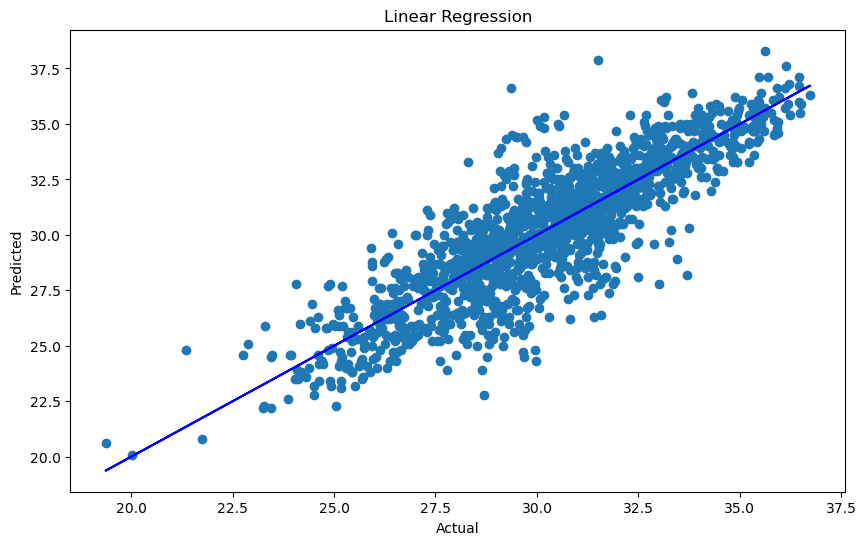

In [230]:
plt.figure(figsize=(10,6))
plt.scatter(x=LR_pred,y=y_test)
plt.plot(LR_pred,LR_pred,color = 'b')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear Regression')
plt.show()

#### Decision Tree Regressor 

In [231]:
from sklearn.tree import DecisionTreeRegressor

In [232]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train,y_train)
dtr_pred = dtr.predict(X_test)
dtr_pred_train = dtr.predict(X_train)
print('R2_score on testing data:',r2_score(y_test,dtr_pred))
print('R2_score on training data:',r2_score(y_train,dtr_pred_train))
print('Mean Absolute Error:',mean_absolute_error(y_test,dtr_pred))
print('Mean Squared Error on training data:',mean_squared_error(y_train,dtr_pred_train))
print('Mean Squared Error on testing data:',mean_squared_error(y_test,dtr_pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,dtr_pred)))

R2_score on testing data: 0.7531087709842221
R2_score on training data: 1.0
Mean Absolute Error: 1.0694498381877025
Mean Squared Error on training data: 6.129058506087499e-32
Mean Squared Error on testing data: 2.275514563106796
Root Mean Squared Error: 1.5084808792645654


#### Random Forest Regressor 

In [234]:
from sklearn.ensemble import RandomForestRegressor

In [235]:
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)
rfr_pred = rfr.predict(X_test)
rfr_pred_train = rfr.predict(X_train)
print('R2_score on testing data:',r2_score(y_test,rfr_pred))
print('R2_score on training data:',r2_score(y_train,rfr_pred_train))
print('Mean Absolute Error:',mean_absolute_error(y_test,rfr_pred))
print('Mean Squared Error on training data:',mean_squared_error(y_train,rfr_pred_train))
print('Mean Squared Error on testing data:',mean_squared_error(y_test,rfr_pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,rfr_pred)))

R2_score on testing data: 0.8843114104728422
R2_score on training data: 0.984927053887775
Mean Absolute Error: 0.7733993527508093
Mean Squared Error on training data: 0.14905839527355108
Mean Squared Error on testing data: 1.0662633553398058
Root Mean Squared Error: 1.032600288272188


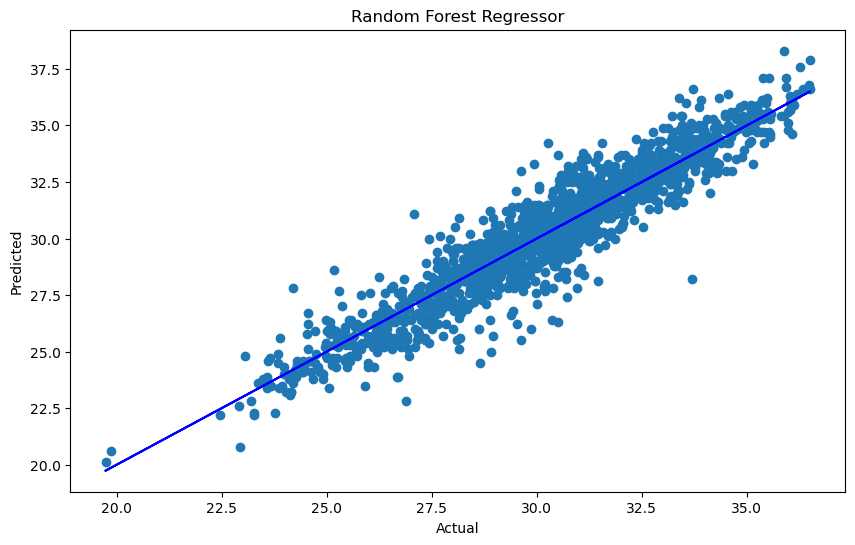

In [236]:
plt.figure(figsize=(10,6))
plt.scatter(x=rfr_pred,y=y_test)
plt.plot(rfr_pred,rfr_pred,color = 'b')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Random Forest Regressor')
plt.show()

#### Support Vector Regressor 

In [237]:
from sklearn.svm import SVR

In [238]:
svr = SVR()
svr.fit(X_train,y_train)
svr_pred = svr.predict(X_test)
svr_pred_train = svr.predict(X_train)
print('R2_score on testing data:',r2_score(y_test,svr_pred))
print('R2_score on training data:',r2_score(y_train,svr_pred_train))
print('Mean Absolute Error:',mean_absolute_error(y_test,svr_pred))
print('Mean Squared Error on training data:',mean_squared_error(y_train,svr_pred_train))
print('Mean Squared Error on testing data:',mean_squared_error(y_test,svr_pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,svr_pred)))

R2_score on testing data: 0.8599001735840108
R2_score on training data: 0.8890395216478691
Mean Absolute Error: 0.8309507045964125
Mean Squared Error on training data: 1.0973031230132066
Mean Squared Error on testing data: 1.2912536284468177
Root Mean Squared Error: 1.1363334142965338


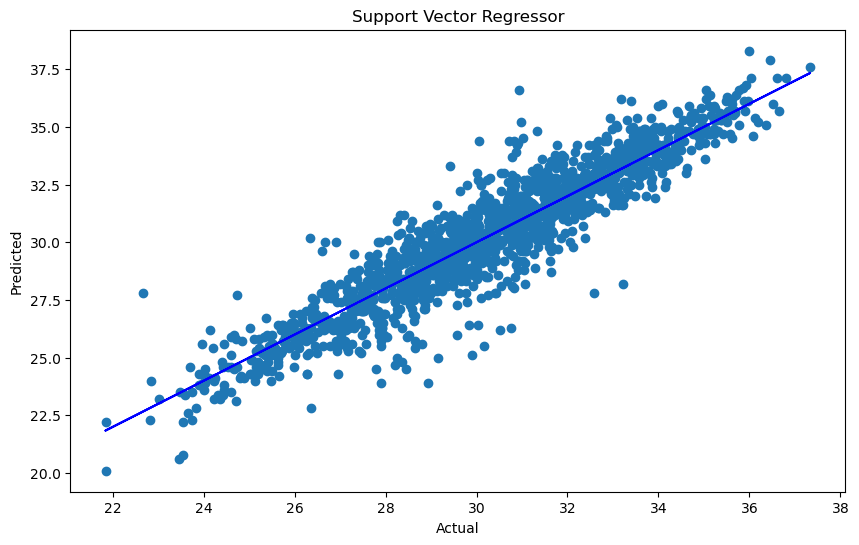

In [239]:
plt.figure(figsize=(10,6))
plt.scatter(x=svr_pred,y=y_test)
plt.plot(svr_pred,svr_pred,color = 'b')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Support Vector Regressor')
plt.show()

#### K-nearest neighbor Regressor 

In [240]:
from sklearn.neighbors import KNeighborsRegressor

In [241]:
knr = KNeighborsRegressor()
knr.fit(X_train,y_train)
knr_pred = knr.predict(X_test)
knr_pred_train = knr.predict(X_train)
print('R2_score on testing data:',r2_score(y_test,knr_pred))
print('R2_score on training data:',r2_score(y_train,knr_pred_train))
print('Mean Absolute Error:',mean_absolute_error(y_test,knr_pred))
print('Mean Squared Error on training data:',mean_squared_error(y_train,knr_pred_train))
print('Mean Squared Error on testing data:',mean_squared_error(y_test,knr_pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,knr_pred)))

R2_score on testing data: 0.8723892147894698
R2_score on training data: 0.9179288078590777
Mean Absolute Error: 0.8169967637540453
Mean Squared Error on training data: 0.811613078666235
Mean Squared Error on testing data: 1.1761462783171521
Root Mean Squared Error: 1.0845027793035626


### Cross- Validation 

In [135]:
#Checking Cross-validation scores for the top three models i.e(RandomForest,Support Vector regression models)
#Random Forest regressor
from sklearn.model_selection import cross_val_score
score = cross_val_score(rfr,X,y,scoring = 'r2')
print(score)
print(score.mean())
print("Difference between mean squared error and cross validation score is - ",(r2_score(y_test,rfr_pred) - score.mean()))

[0.65569125 0.61188235 0.63972126 0.83770954 0.62676192]
0.6743532631139879
Difference between mean squared error and cross validation score is -  0.21083038196998782


In [136]:
#Support Vector Regressor
from sklearn.model_selection import cross_val_score
score = cross_val_score(svr,X,y,scoring = 'r2')
print(score)
print(score.mean())
print("Difference between mean squared error and cross validation score is - ",(r2_score(y_test,svr_pred) - score.mean()))

[0.57913104 0.51361563 0.69152294 0.79559793 0.640267  ]
0.6440269084682634
Difference between mean squared error and cross validation score is -  0.21587326511574745


In [137]:
#K-Neighbor Regressor
from sklearn.model_selection import cross_val_score
score = cross_val_score(knr,X,y,scoring = 'r2')
print(score)
print(score.mean())
print("Difference between mean squared error and cross validation score is - ",(r2_score(y_test,knr_pred) - score.mean()))

[0.40734725 0.2701449  0.4198642  0.68349583 0.48279742]
0.452729919163079
Difference between mean squared error and cross validation score is -  0.41965929562639087


Conclusion:

-- From the values of the metrics as seen in the above cells of different regression models, I will be choosing Random Forest Regressor as my final model for the prediction of Next day Maximum Temperature(Next_Tmax)

-- From the above values observed from the r2 scores,MSE and MAE..Random Forest Regressor stands out as the best model for the prediction, because of it's high r2 score on both training and testing data and also the cross validation scores which tells us the performance of the model is much better than other regression models, Random Forest can handle large datasets with a huge number of features..

Therefore, Random Forest Regressor is our final model..

### Hyper Parameter Tuning 

In [139]:
print(rfr.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [140]:
from sklearn.model_selection import RandomizedSearchCV
param_dist = {'bootstrap': [True,False],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]}
rfr = RandomForestRegressor()
random_search = RandomizedSearchCV(rfr,param_distributions=param_dist,cv=3)
random_search.fit(X_train,y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [80, 90, 100, 110],
                                        'max_features': [2, 3],
                                        'min_samples_leaf': [3, 4, 5],
                                        'min_samples_split': [8, 10, 12],
                                        'n_estimators': [100, 200, 300, 1000]})

In [141]:
random_search.best_params_

{'n_estimators': 100,
 'min_samples_split': 10,
 'min_samples_leaf': 3,
 'max_features': 3,
 'max_depth': 100,
 'bootstrap': False}

In [243]:
Final_model = RandomForestRegressor(n_estimators = 100, min_samples_split = 10,min_samples_leaf = 3,max_features = 3,max_depth = 100,bootstrap = False)
Final_model.fit(X_train,y_train)
fm_pred = Final_model.predict(X_test)
print('R2_score on testing data:',r2_score(y_test,fm_pred))

R2_score on testing data: 0.8992144893479349


-- Improvement of 1.37% after applying hyperparameter tuning in the r2 score of the testing data of the Final model.

## Saving the Model 

In [244]:
import joblib
joblib.dump(Final_model,"Temperature_Prediction_(next_day_max_temp).pkl")

['Temperature_Prediction_(next_day_max_temp).pkl']

In [245]:
model = joblib.load("Temperature_Prediction_(next_day_max_temp).pkl")
prediction = model.predict(X_test)
prediction

array([30.72352778, 33.24985595, 29.92239167, ..., 25.50675675,
       30.9459246 , 33.7004627 ])

In [246]:
b = np.array(y_test)
df = pd.DataFrame()
df['Predicted'] = prediction
df['Original'] = b
df

Predicted  Original
0     30.723528      30.2
1     33.249856      33.2
2     29.922392      29.5
3     33.001345      32.6
4     34.167005      35.0
...         ...       ...
1540  29.584798      28.7
1541  28.341482      27.4
1542  25.506757      26.1
1543  30.945925      31.3
1544  33.700463      34.9

[1545 rows x 2 columns]

### 2nd Prediction (i.e next day minimum temp) 

#### Data Pre-processing 

In [247]:
temp

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0         1.0          28.7          21.4    58.255688    91.116364   
1         2.0          31.9          21.6    52.263397    90.604721   
2         3.0          31.6          23.3    48.690479    83.973587   
3         4.0          32.0          23.4    58.239788    96.483688   
4         5.0          31.4          21.9    56.174095    90.155128   
...       ...           ...           ...          ...          ...   
7745     21.0          23.1          17.8    24.688997    78.261383   
7746     22.0          22.5          17.4    30.094858    83.690018   
7747     23.0          23.3          17.1    26.741310    78.869858   
7748     24.0          23.3          17.7    24.040634    77.294975   
7749     25.0          23.2          17.4    22.933014    77.243744   

      LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  LDAPS_PPT1  \
0            28.074101         23.006936  6.818887   69.451805         0.0   
1            29.850689         24.035009  5.691890   51.937448         0.0   
2            30.091292         24.565633  6.138224   20.573050         0.0   
3            29.704629         23.326177  5.650050   65.727144         0.0   
4            29.113934         23.486480  5.735004  107.965535         0.0   
...                ...               ...       ...         ...         ...   
7745         27.812697         18.303014  6.603253    9.614074         0.0   
7746         26.704905         17.814038  5.768083   82.146707         0.0   
7747         26.352081         18.775678  6.148918   72.058294         0.0   
7748         27.010193         18.733519  6.542819   47.241457         0.0   
7749         27.939516         18.522965  7.289264    9.090034         0.0   

      ...  LDAPS_PPT3  LDAPS_PPT4      lat      lon  Solar radiation  \
0     ...         0.0         0.0  37.6046  126.991      5992.895996   
1     ...         0.0         0.0  37.6046  127.032      5869.312500   
2     ...         0.0         0.0  37.5776  127.058      5863.555664   
3     ...         0.0         0.0  37.6450  127.022      5856.964844   
4     ...         0.0         0.0  37.5507  127.135      5859.552246   
...   ...         ...         ...      ...      ...              ...   
7745  ...         0.0         0.0  37.5507  127.040      4456.024414   
7746  ...         0.0         0.0  37.5102  127.086      4441.803711   
7747  ...         0.0         0.0  37.5372  126.891      4443.313965   
7748  ...         0.0         0.0  37.5237  126.909      4438.373535   
7749  ...         0.0         0.0  37.5237  126.970      4451.345215   

      Next_Tmax  Next_Tmin  Day  Month  Year  
0          29.1       21.2   30      6  2013  
1          30.5       22.5   30      6  2013  
2          31.1       23.9   30      6  2013  
3          31.7       24.3   30      6  2013  
4          31.2       22.5   30      6  2013  
...         ...        ...  ...    ...   ...  
7745       27.6       17.7   30      8  2017  
7746       28.0       17.1   30      8  2017  
7747       28.3       18.1   30      8  2017  
7748       28.6       18.8   30      8  2017  
7749       27.8       17.4   30      8  2017  

[7723 rows x 21 columns]

In [154]:
temp.shape

(7723, 21)

In [248]:
temp_2 = temp.copy()

In [249]:
temp_2

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0         1.0          28.7          21.4    58.255688    91.116364   
1         2.0          31.9          21.6    52.263397    90.604721   
2         3.0          31.6          23.3    48.690479    83.973587   
3         4.0          32.0          23.4    58.239788    96.483688   
4         5.0          31.4          21.9    56.174095    90.155128   
...       ...           ...           ...          ...          ...   
7745     21.0          23.1          17.8    24.688997    78.261383   
7746     22.0          22.5          17.4    30.094858    83.690018   
7747     23.0          23.3          17.1    26.741310    78.869858   
7748     24.0          23.3          17.7    24.040634    77.294975   
7749     25.0          23.2          17.4    22.933014    77.243744   

      LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  LDAPS_PPT1  \
0            28.074101         23.006936  6.818887   69.451805         0.0   
1            29.850689         24.035009  5.691890   51.937448         0.0   
2            30.091292         24.565633  6.138224   20.573050         0.0   
3            29.704629         23.326177  5.650050   65.727144         0.0   
4            29.113934         23.486480  5.735004  107.965535         0.0   
...                ...               ...       ...         ...         ...   
7745         27.812697         18.303014  6.603253    9.614074         0.0   
7746         26.704905         17.814038  5.768083   82.146707         0.0   
7747         26.352081         18.775678  6.148918   72.058294         0.0   
7748         27.010193         18.733519  6.542819   47.241457         0.0   
7749         27.939516         18.522965  7.289264    9.090034         0.0   

      ...  LDAPS_PPT3  LDAPS_PPT4      lat      lon  Solar radiation  \
0     ...         0.0         0.0  37.6046  126.991      5992.895996   
1     ...         0.0         0.0  37.6046  127.032      5869.312500   
2     ...         0.0         0.0  37.5776  127.058      5863.555664   
3     ...         0.0         0.0  37.6450  127.022      5856.964844   
4     ...         0.0         0.0  37.5507  127.135      5859.552246   
...   ...         ...         ...      ...      ...              ...   
7745  ...         0.0         0.0  37.5507  127.040      4456.024414   
7746  ...         0.0         0.0  37.5102  127.086      4441.803711   
7747  ...         0.0         0.0  37.5372  126.891      4443.313965   
7748  ...         0.0         0.0  37.5237  126.909      4438.373535   
7749  ...         0.0         0.0  37.5237  126.970      4451.345215   

      Next_Tmax  Next_Tmin  Day  Month  Year  
0          29.1       21.2   30      6  2013  
1          30.5       22.5   30      6  2013  
2          31.1       23.9   30      6  2013  
3          31.7       24.3   30      6  2013  
4          31.2       22.5   30      6  2013  
...         ...        ...  ...    ...   ...  
7745       27.6       17.7   30      8  2017  
7746       28.0       17.1   30      8  2017  
7747       28.3       18.1   30      8  2017  
7748       28.6       18.8   30      8  2017  
7749       27.8       17.4   30      8  2017  

[7723 rows x 21 columns]

In [250]:
temp_2.drop('Next_Tmax', axis=1, inplace = True)

In [251]:
#Independent Variable (i.e Next_Tmin)
y = temp_2['Next_Tmin']
y

0       21.2
1       22.5
2       23.9
3       24.3
4       22.5
        ... 
7745    17.7
7746    17.1
7747    18.1
7748    18.8
7749    17.4
Name: Next_Tmin, Length: 7723, dtype: float64

In [252]:
x = temp_2.drop('Next_Tmin',axis=1)
x

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0         1.0          28.7          21.4    58.255688    91.116364   
1         2.0          31.9          21.6    52.263397    90.604721   
2         3.0          31.6          23.3    48.690479    83.973587   
3         4.0          32.0          23.4    58.239788    96.483688   
4         5.0          31.4          21.9    56.174095    90.155128   
...       ...           ...           ...          ...          ...   
7745     21.0          23.1          17.8    24.688997    78.261383   
7746     22.0          22.5          17.4    30.094858    83.690018   
7747     23.0          23.3          17.1    26.741310    78.869858   
7748     24.0          23.3          17.7    24.040634    77.294975   
7749     25.0          23.2          17.4    22.933014    77.243744   

      LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  LDAPS_PPT1  \
0            28.074101         23.006936  6.818887   69.451805         0.0   
1            29.850689         24.035009  5.691890   51.937448         0.0   
2            30.091292         24.565633  6.138224   20.573050         0.0   
3            29.704629         23.326177  5.650050   65.727144         0.0   
4            29.113934         23.486480  5.735004  107.965535         0.0   
...                ...               ...       ...         ...         ...   
7745         27.812697         18.303014  6.603253    9.614074         0.0   
7746         26.704905         17.814038  5.768083   82.146707         0.0   
7747         26.352081         18.775678  6.148918   72.058294         0.0   
7748         27.010193         18.733519  6.542819   47.241457         0.0   
7749         27.939516         18.522965  7.289264    9.090034         0.0   

      LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon  Solar radiation  \
0            0.0         0.0         0.0  37.6046  126.991      5992.895996   
1            0.0         0.0         0.0  37.6046  127.032      5869.312500   
2            0.0         0.0         0.0  37.5776  127.058      5863.555664   
3            0.0         0.0         0.0  37.6450  127.022      5856.964844   
4            0.0         0.0         0.0  37.5507  127.135      5859.552246   
...          ...         ...         ...      ...      ...              ...   
7745         0.0         0.0         0.0  37.5507  127.040      4456.024414   
7746         0.0         0.0         0.0  37.5102  127.086      4441.803711   
7747         0.0         0.0         0.0  37.5372  126.891      4443.313965   
7748         0.0         0.0         0.0  37.5237  126.909      4438.373535   
7749         0.0         0.0         0.0  37.5237  126.970      4451.345215   

      Day  Month  Year  
0      30      6  2013  
1      30      6  2013  
2      30      6  2013  
3      30      6  2013  
4      30      6  2013  
...   ...    ...   ...  
7745   30      8  2017  
7746   30      8  2017  
7747   30      8  2017  
7748   30      8  2017  
7749   30      8  2017  

[7723 rows x 19 columns]

In [160]:
x.shape

(7723, 19)

In [253]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = pd.DataFrame(sc.fit_transform(x))

In [254]:
X

0         1         2         3         4         5         6   \
0    -1.664663 -0.361913 -0.760330  0.103957  0.383605 -0.526903 -0.216792   
1    -1.526035  0.720643 -0.677021 -0.307297  0.312101  0.079953  0.224302   
2    -1.387408  0.619154  0.031110 -0.552509 -0.614626  0.162140  0.451966   
3    -1.248780  0.754473  0.072765  0.102866  1.133710  0.030062 -0.079822   
4    -1.110152  0.551494 -0.552057 -0.038904  0.249269 -0.171711 -0.011044   
...        ...       ...       ...       ...       ...       ...       ...   
7718  1.107891 -2.256387 -2.259902 -2.199745 -1.412928 -0.616195 -2.235007   
7719  1.246518 -2.459367 -2.426521 -1.828737 -0.654255 -0.994601 -2.444802   
7720  1.385146 -2.188728 -2.551485 -2.058894 -1.327892 -1.115121 -2.032211   
7721  1.523774 -2.188728 -2.301557 -2.244243 -1.547988 -0.890319 -2.050299   
7722  1.662401 -2.222558 -2.426521 -2.320259 -1.555147 -0.572876 -2.140637   

            7         8         9         10        11        12        13  \
0    -0.127716  0.208712 -0.730239 -0.670846 -0.646126 -0.562077  1.188219   
1    -0.648283 -0.314053 -0.730239 -0.670846 -0.646126 -0.562077  1.188219   
2    -0.442119 -1.250210 -0.730239 -0.670846 -0.646126 -0.562077  0.652150   
3    -0.667609  0.097539 -0.730239 -0.670846 -0.646126 -0.562077  1.990336   
4    -0.628368  1.358261 -0.730239 -0.670846 -0.646126 -0.562077  0.118067   
...        ...       ...       ...       ...       ...       ...       ...   
7718 -0.227319 -1.577311 -0.730239 -0.670846 -0.646126 -0.562077  0.118067   
7719 -0.613089  0.587626 -0.730239 -0.670846 -0.646126 -0.562077 -0.686036   
7720 -0.437179  0.286510 -0.730239 -0.670846 -0.646126 -0.562077 -0.149967   
7721 -0.255234 -0.454217 -0.730239 -0.670846 -0.646126 -0.562077 -0.418002   
7722  0.089554 -1.592952 -0.730239 -0.670846 -0.646126 -0.562077 -0.418002   

            14        15       16        17        18  
0    -0.004705  1.516820  1.57141 -2.765916 -1.412842  
1     0.512235  1.228776  1.57141 -2.765916 -1.412842  
2     0.840050  1.215358  1.57141 -2.765916 -1.412842  
3     0.386152  1.199997  1.57141 -2.765916 -1.412842  
4     1.810888  1.206027  1.57141 -2.765916 -1.412842  
...        ...       ...      ...       ...       ...  
7718  0.613101 -2.065260  1.57141  1.005144  1.416506  
7719  1.193082 -2.098405  1.57141  1.005144  1.416506  
7720 -1.265534 -2.094885  1.57141  1.005144  1.416506  
7721 -1.038585 -2.106400  1.57141  1.005144  1.416506  
7722 -0.269479 -2.076166  1.57141  1.005144  1.416506  

[7723 rows x 19 columns]

In [255]:
# Now, Splitting the data into training and test dataset
from sklearn.model_selection import train_test_split
X1_train,X1_test,y1_train,y1_test = train_test_split(X,y,test_size = 0.20,random_state = 42)

In [256]:
print("X_train ",X1_train.shape)
print("y_train ",y1_train.shape)
print("X_test ",X1_test.shape)
print("y_test ",y1_test.shape)

X_train  (6178, 19)
y_train  (6178,)
X_test  (1545, 19)
y_test  (1545,)


## Model Training 

#### Linear Regression 

In [257]:
from sklearn.linear_model import LinearRegression

In [258]:
LR = LinearRegression()
LR.fit(X1_train,y1_train)
LR_pred = LR.predict(X1_test)
LR_pred_train = LR.predict(X1_train)
pred_train = LR.predict(X1_train)
print('R2_score on testing data:',r2_score(y1_test,LR_pred))
print('R2_score on training data:',r2_score(y1_train,LR_pred_train))
print('Mean Absolute Error:',mean_absolute_error(y1_test,LR_pred))
print('Mean Squared Error on training data:',mean_squared_error(y1_train,LR_pred_train))
print('Mean Squared Error on testing data:',mean_squared_error(y1_test,LR_pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y1_test,LR_pred)))

R2_score on testing data: 0.8266757483206468
R2_score on training data: 0.8227753052531482
Mean Absolute Error: 0.7847012690381433
Mean Squared Error on training data: 1.1054273335293503
Mean Squared Error on testing data: 1.018580270447392
Root Mean Squared Error: 1.0092473782217084


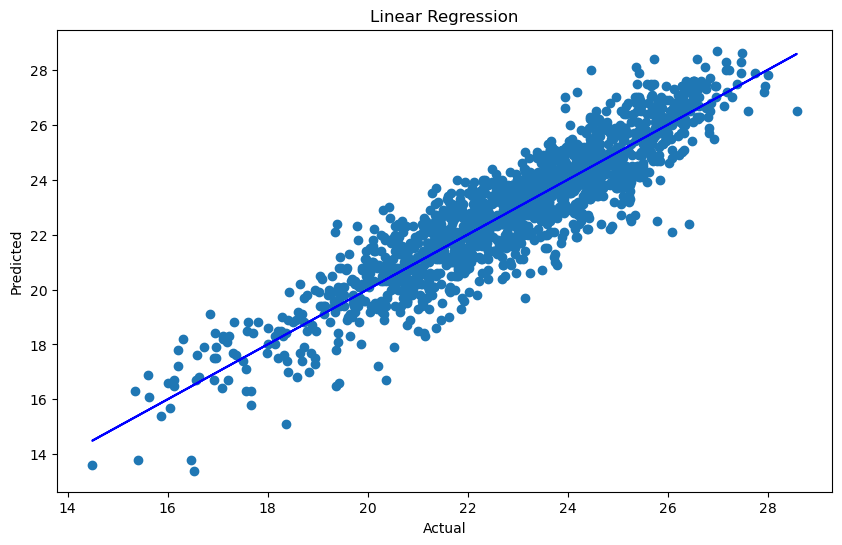

In [259]:
plt.figure(figsize=(10,6))
plt.scatter(x=LR_pred,y=y1_test)
plt.plot(LR_pred,LR_pred,color = 'b')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear Regression')
plt.show()

#### Decision Tree Regressor 

In [260]:
from sklearn.tree import DecisionTreeRegressor

In [261]:
dtr = DecisionTreeRegressor()
dtr.fit(X1_train,y1_train)
dtr_pred = dtr.predict(X1_test)
dtr_pred_train = dtr.predict(X1_train)
print('R2_score on testing data:',r2_score(y1_test,dtr_pred))
print('R2_score on training data:',r2_score(y1_train,dtr_pred_train))
print('Mean Absolute Error:',mean_absolute_error(y1_test,dtr_pred))
print('Mean Squared Error on training data:',mean_squared_error(y1_train,dtr_pred_train))
print('Mean Squared Error on testing data:',mean_squared_error(y1_test,dtr_pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y1_test,dtr_pred)))

R2_score on testing data: 0.7695558050978024
R2_score on training data: 1.0
Mean Absolute Error: 0.8514563106796117
Mean Squared Error on training data: 1.1645211161566248e-31
Mean Squared Error on testing data: 1.3542588996763754
Root Mean Squared Error: 1.16372629929738


#### Random Forest Regressor 

In [263]:
from sklearn.ensemble import RandomForestRegressor

In [264]:
rfr = RandomForestRegressor()
rfr.fit(X1_train,y1_train)
rfr_pred = rfr.predict(X1_test)
rfr_pred_train = rfr.predict(X1_train)
print('R2_score on testing data:',r2_score(y1_test,rfr_pred))
print('R2_score on training data:',r2_score(y1_train,rfr_pred_train))
print('Mean Absolute Error:',mean_absolute_error(y1_test,rfr_pred))
print('Mean Squared Error on training data:',mean_squared_error(y1_train,rfr_pred_train))
print('Mean Squared Error on testing data:',mean_squared_error(y1_test,rfr_pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y1_test,rfr_pred)))

R2_score on testing data: 0.902104359714733
R2_score on training data: 0.9861491059767223
Mean Absolute Error: 0.5825702265372167
Mean Squared Error on training data: 0.0863940370670122
Mean Squared Error on testing data: 0.5753064951456307
Root Mean Squared Error: 0.7584896143953658


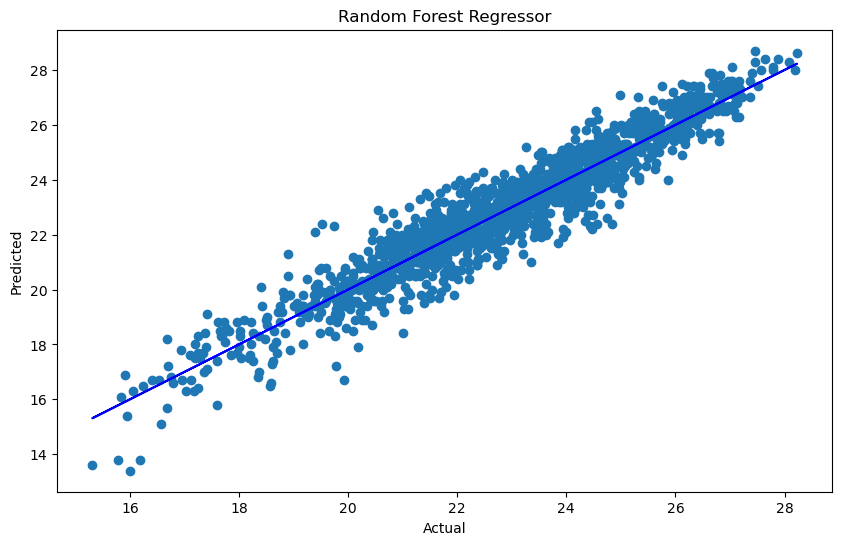

In [265]:
plt.figure(figsize=(10,6))
plt.scatter(x=rfr_pred,y=y1_test)
plt.plot(rfr_pred,rfr_pred,color = 'b')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Random Forest Regressor')
plt.show()

#### Support Vector Regressor 

In [266]:
from sklearn.svm import SVR

In [267]:
svr = SVR()
svr.fit(X1_train,y1_train)
svr_pred = svr.predict(X1_test)
svr_pred_train = svr.predict(X1_train)
print('R2_score on testing data:',r2_score(y1_test,svr_pred))
print('R2_score on training data:',r2_score(y1_train,svr_pred_train))
print('Mean Absolute Error:',mean_absolute_error(y1_test,svr_pred))
print('Mean Squared Error on training data:',mean_squared_error(y1_train,svr_pred_train))
print('Mean Squared Error on testing data:',mean_squared_error(y1_test,svr_pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y1_test,svr_pred)))

R2_score on testing data: 0.9001739899437181
R2_score on training data: 0.9191956897752283
Mean Absolute Error: 0.5807093323602481
Mean Squared Error on training data: 0.5040115505180441
Mean Squared Error on testing data: 0.5866507620002268
Root Mean Squared Error: 0.7659313037082548


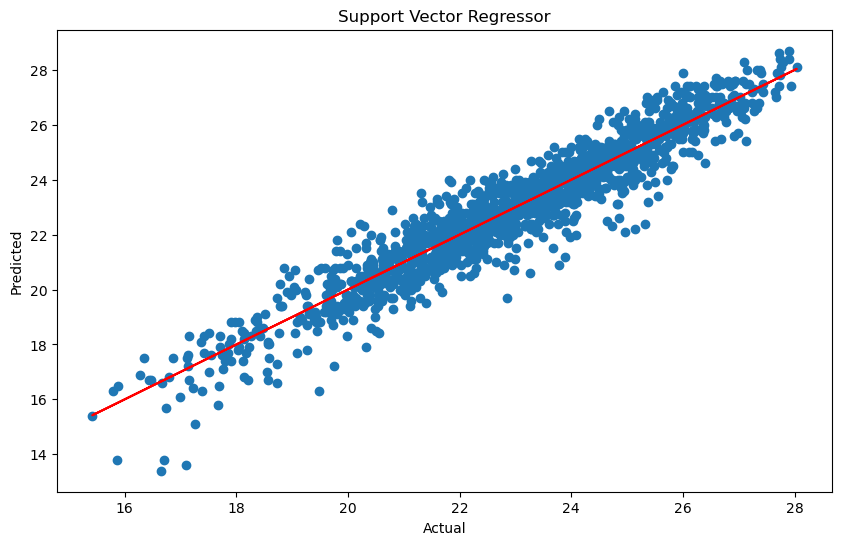

In [268]:
plt.figure(figsize=(10,6))
plt.scatter(x=svr_pred,y=y1_test)
plt.plot(svr_pred,svr_pred,color = 'r')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Support Vector Regressor')
plt.show()

#### K-neighbor Regressor 

In [269]:
from sklearn.neighbors import KNeighborsRegressor

In [270]:
knr = KNeighborsRegressor()
knr.fit(X1_train,y1_train)
knr_pred = knr.predict(X1_test)
knr_pred_train = knr.predict(X1_train)
print('R2_score on testing data:',r2_score(y1_test,knr_pred))
print('R2_score on training data:',r2_score(y1_train,knr_pred_train))
print('Mean Absolute Error:',mean_absolute_error(y1_test,knr_pred))
print('Mean Squared Error on training data:',mean_squared_error(y1_train,knr_pred_train))
print('Mean Squared Error on testing data:',mean_squared_error(y1_test,knr_pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y1_test,knr_pred)))

R2_score on testing data: 0.8674687000894467
R2_score on training data: 0.9150375272388287
Mean Absolute Error: 0.6839093851132687
Mean Squared Error on training data: 0.5299478148268049
Mean Squared Error on testing data: 0.778851003236246
Root Mean Squared Error: 0.8825253555769635


### Cross-Validation 

In [183]:
#Random Forest Regressor
score = cross_val_score(rfr,X,y,cv=5,scoring = 'r2')
print(score)
print(score.mean())
print("Difference between r2 score and cross validation score is - ",(r2_score(y1_test,rfr_pred) - score.mean()))

[0.65619156 0.65515812 0.80633891 0.836776   0.86801124]
0.7644951649034244
Difference between r2 score and cross validation score is -  0.13949432960814123


In [184]:
#Support Vector Regressor
score = cross_val_score(svr,X,y,cv=5,scoring = 'r2')
print(score)
print(score.mean())
print("Difference between r2 score and cross validation score is - ",(r2_score(y1_test,svr_pred) - score.mean()))

[0.49223871 0.60253031 0.74833745 0.79193777 0.81523827]
0.6900565007941705
Difference between r2 score and cross validation score is -  0.21011748914954764


Conclusion:

-- From the values of the metrics as seen in the above cells of different regression models, I will be choosing Support Vector Regressor as my final model for the prediction of Next day Minimum Temperature(Next_Tmin).

-- From the above values observed from the r2 scores,MSE and MAE..Random Forest Regressor stands out as the best model for the prediction, because of it's high r2 score on both training and testing data and also the cross validation scores which tells us the performance of the model is much better than other regression models.

Therefore, Support Vector Regressor is our final model..

### HyperParameter Tuning 

In [186]:
print(svr.get_params())

{'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}


In [188]:
from sklearn.model_selection import RandomizedSearchCV
param_dist = {'C': [0.1,1,10,100,1000],
    'gamma': ['scale','auto']}
svr = SVR()
random_search = RandomizedSearchCV(svr,param_distributions=param_dist,cv=3)
random_search.fit(X1_train,y1_train)

RandomizedSearchCV(cv=3, estimator=SVR(),
                   param_distributions={'C': [0.1, 1, 10, 100, 1000],
                                        'gamma': ['scale', 'auto']})

In [189]:
random_search.best_params_

{'gamma': 'auto', 'C': 10}

In [272]:
Final_model = SVR(C = 10 , gamma = 'auto')
Final_model.fit(X1_train,y1_train)
fm_pred = Final_model.predict(X1_test)
print('R2_score on testing data:',r2_score(y1_test,fm_pred))

R2_score on testing data: 0.9369146952356815


-- Improvement of 3.68% after applying hyperparameter tuning in the r2 score of the testing data of the Final model.

## Saving the Model 

In [273]:
import joblib
joblib.dump(Final_model,"Temperature_Prediction__(next_day_min_temp).pkl")

['Temperature_Prediction__(next_day_min_temp).pkl']

In [274]:
model = joblib.load("Temperature_Prediction__(next_day_min_temp).pkl")
prediction = model.predict(X1_test)
prediction

array([21.42280289, 23.95910314, 21.04204227, ..., 22.44769347,
       23.09279024, 21.54134886])

In [275]:
b = np.array(y1_test)
df = pd.DataFrame()
df['Predicted'] = prediction
df['Original'] = b
df

Predicted  Original
0     21.422803      21.7
1     23.959103      22.5
2     21.042042      21.8
3     26.257984      26.2
4     23.898945      24.3
...         ...       ...
1540  23.000650      23.7
1541  19.769368      20.8
1542  22.447693      22.1
1543  23.092790      23.2
1544  21.541349      21.2

[1545 rows x 2 columns]